<a href="https://colab.research.google.com/github/jerovernay/tp-Alc/blob/main/codigo/TP1y2_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Carga de paquetes necesarios para graficar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Para leer archivos
import geopandas as gpd # Para hacer cosas geográficas
import seaborn as sns # Para hacer plots lindos
import networkx as nx # Construcción de la red en NetworkX
import scipy


# Preambulo

En esta sección cargamos los datos y los visualizamos. También construimos la matriz de adyacencia de la red de museos.

## Carga de datos de los museos

El listado de los museos, con el que se construye el [mapa](https://mapas.museosabiertos.org/museos/caba/), lo podemos encontrar [acá](https://github.com/MuseosAbiertos/Leaflet-museums-OpenStreetMap/blob/principal/data/export.geojson?short_path=bc357f3). También descargamos los barrios de CABA como complemento para los gráficos.

In [ ]:
# Leemos el archivo, retenemos aquellos museos que están en CABA, y descartamos aquellos que no tienen latitud y longitud
museos = gpd.read_file('https://raw.githubusercontent.com/MuseosAbiertos/Leaflet-museums-OpenStreetMap/refs/heads/principal/data/export.geojson')
barrios = gpd.read_file('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson')

## Visualización

<Axes: >

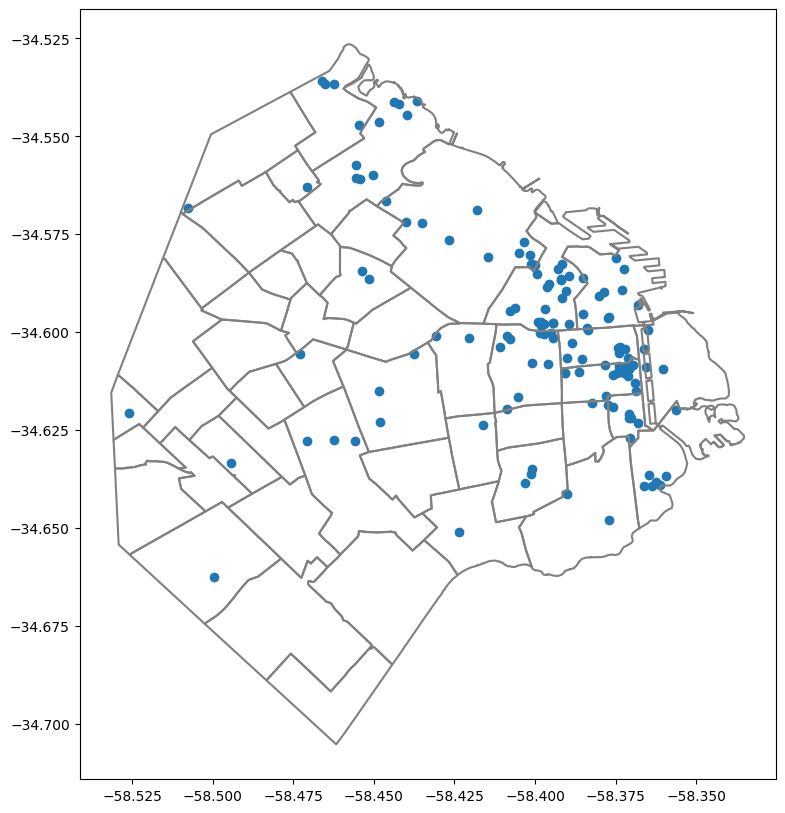

In [ ]:
# Armamos el gráfico para visualizar los museos
fig, ax = plt.subplots(figsize=(10, 10))
barrios.boundary.plot(color='gray',ax=ax)
museos.plot(ax=ax)

## Cálculo de la matriz de distancias

Ahora construimos la matriz de distancias entre todos los museos. Como la tierra es un [geoide](https://es.wikipedia.org/wiki/Geoide) (es decir que no es [plana](https://es.wikipedia.org/wiki/Terraplanismo)), el cálculo de distancias no es una operación obvia. Una opción es proyectar a un [sistema de coordenadas local](https://geopandas.org/en/stable/docs/user_guide/projections.html), de forma tal que las distancias euclideas se correspondan con las distancias en metros. En este notebook usamos [EPSG](https://en.wikipedia.org/wiki/EPSG_Geodetic_Parameter_Dataset) 22184.

In [ ]:
# En esta línea:
# Tomamos museos, lo convertimos al sistema de coordenadas de interés, extraemos su geometría (los puntos del mapa),
# calculamos sus distancias a los otros puntos de df, redondeamos (obteniendo distancia en metros), y lo convertimos a un array 2D de numpy
D = museos.to_crs("EPSG:22184").geometry.apply(lambda g: museos.to_crs("EPSG:22184").distance(g)).round().to_numpy()

### Matriz de adyacencia: construimos una matriz conectando a cada museo con los $m$ más cercanos

In [ ]:
def construye_adyacencia(D,m):
    # Función que construye la matriz de adyacencia del grafo de museos
    # D matriz de distancias, m cantidad de links por nodo
    # Retorna la matriz de adyacencia como un numpy.
    D = D.copy()
    l = [] # Lista para guardar las filas
    for fila in D: # recorriendo las filas, anexamos vectores lógicos
        l.append(fila<=fila[np.argsort(fila)[m]] ) # En realidad, elegimos todos los nodos que estén a una distancia menor o igual a la del m-esimo más cercano
    A = np.asarray(l).astype(int) # Convertimos a entero
    np.fill_diagonal(A,0) # Borramos diagonal para eliminar autolinks
    return(A)

m = 3 # Cantidad de links por nodo
A = construye_adyacencia(D,m)

## Construcción de la red en NetworkX (sólo para las visualizaciones)

In [ ]:
G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia
# Construimos un layout a partir de las coordenadas geográficas
G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}

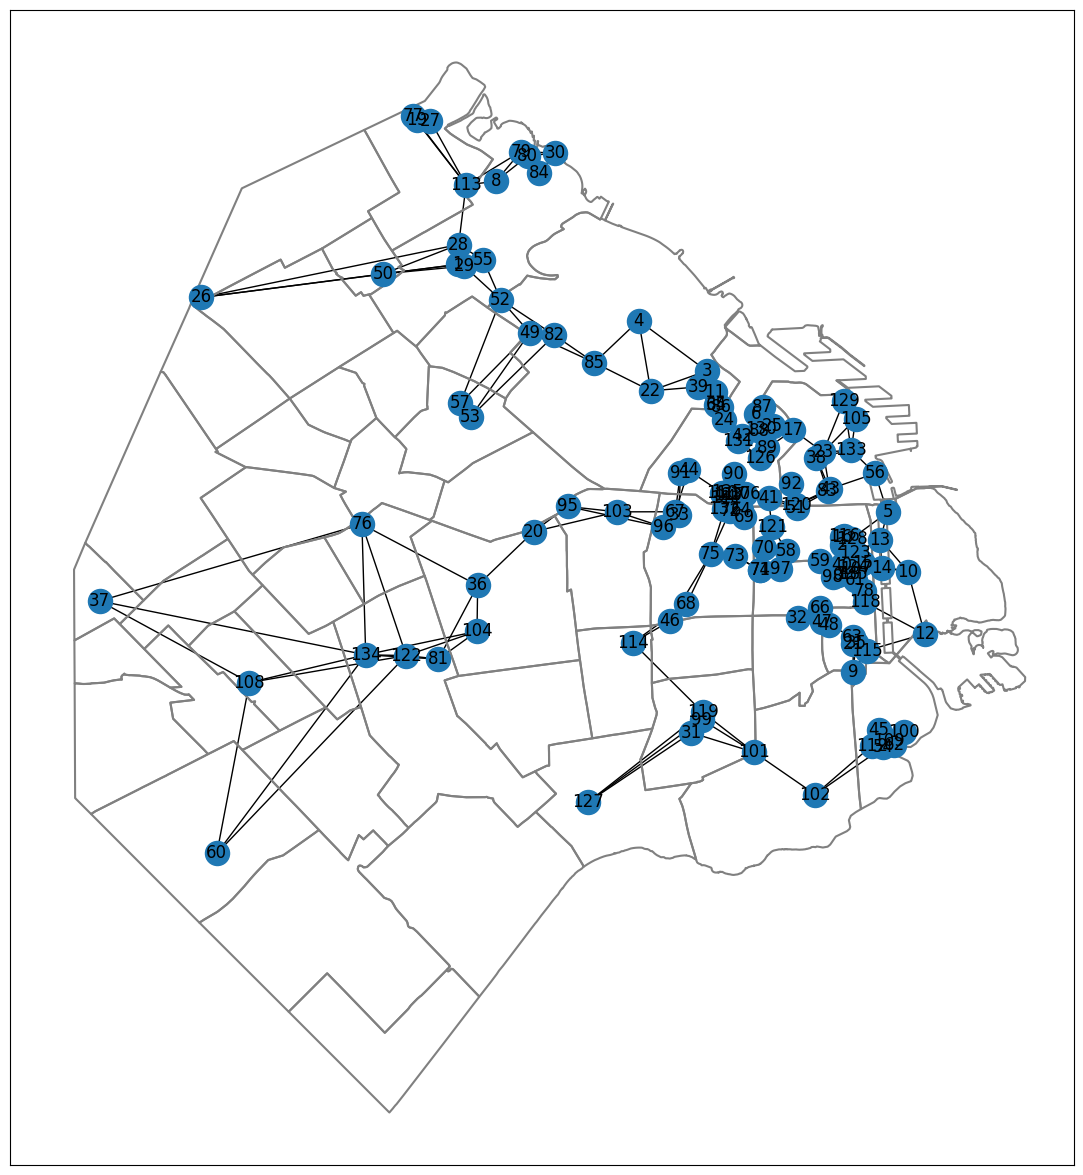

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15)) # Visualización de la red en el mapa
barrios.to_crs("EPSG:22184").boundary.plot(color='gray',ax=ax) # Graficamos Los barrios
nx.draw_networkx(G,G_layout,ax=ax) # Graficamos los museos

# Resolución del TP

Aquí empieza la aventura... ¡diviertanse y consulten lo que necesiten!

# Punto 1:





##Resolucion

Tenemos que probar la igualdad:

$$
M ⋅ p = B
$$

donde:

$$
M = \frac{N}{\alpha} \left( I - (1 - \alpha) \; C \right) \quad \text {y } \, B = 1 \\[12pt]
$$


A partir de los datos dados vamos a manipular algebraicamente esta ecuación para llegar a la forma:

&nbsp;


$$
M ⋅ p = B \quad \text {tal que} \quad M ⋅ p = 1 \\[12pt]
$$

Partimos de la ecuacion (3):

&nbsp;

$$
p = (1 - \alpha)\, C ⋅ p \, + \, \frac {α}{N} \cdot 1 \\[12pt]
$$

Reordeno la ecuacion (3) para que me queden juntos los valores de $p$:

&nbsp;

$$
p - (1 - \alpha)\, C p \, = \, \frac {α}{N} \\[12pt]
$$

$$ \left( I - (1 - \alpha) \; C \right) \; \cdot \; p \; = \; \frac {α}{N} \\[12pt] $$

$$ \frac {N}{\alpha} \; \left( I - (1 - \alpha) \; C \right) \; \cdot \; p \; = \; 1 \\[12pt] $$

$$ M \; \cdot \; p \; = \; 1 \\[8pt]$$

#### De esta manera probamos que el vector de rankings $p$ es solucion de la ecuacion

# Punto 2:


##Resolucion

Para que exista una unica solucion para el sitema de ecuaciones $M ⋅ p = b$ donde:

&nbsp;

$$ M = \frac{N}{\alpha} \left( I - (1 - \alpha) \; C \, \right) \quad \text {y } \, B = 1 \\[12pt] $$

Necesitamos que la matriz $M$ sea inversible:

&nbsp;

$$ M \, ⋅ \, p \; = \; B \quad ⟹ \quad p \; = \; (M)^{-1} \; \cdot \; B \\[8pt]$$

$$ \exists\, M^{-1} \;\Rightarrow\; \exists!\, p \\[10pt] $$

Si existe la inversa de $M$ existe una unica solucion $p$

&nbsp;

El enunciado nos brinda que $0 < α < 1$ , por lo tanto, esto nos permite ver que la inversibilidad de la matriz depende exlclusivamente de $(I - (1 - α) \, C)$ tal que:

&nbsp;

$$ M^{-1} \; = \left( \; \frac{N}{\alpha} \left( I - (1 - \alpha) \; C \, \right) \, \right)^{-1} \\[10pt] $$

$$ M^{-1} \; = \; \frac{α}{N} \, \left( I - (1 - \alpha) \; C \, \right)^{-1} \\[8pt] $$

$$ \; \frac{α}{N} \neq 0 \; \text{ya que} \; \alpha \in (0,1) \\[12pt]$$

De esta forma vemos que $\frac{α}{N}$ es solamente un factor escalar de $M$

Por lo tanto solo quedaria ver que $(\, I \, - \, (\,1\, - α\,) \, C \,) $ sea inversible.

Vamos a probar que $M$ es siempre inversible

Demostremoslo por reduccion al absurdo:

&nbsp;

$$ \text{Consideremos la matriz } A \; = \; I \; -\; (\;1\;-\;\alpha\;)\;C \\[10pt]$$
$$ \text{Supongamos que } A \text{ no es inversible. Entonces existe un vector } x \neq 0 \text{ tal que } Ax = 0. \\[10pt]$$
$$ \text{Es decir: } (I \, -\,  (\,1\,-\,\alpha\,)\,C)\,x\, =\, 0 \\[10pt]$$
$$ \text{Reordenando en funcion de $x$ : }\;  x \,  =\,  (\,1\,-\,\alpha\,)\;Cx \\[10pt]$$
$$ \text{Llamemos } \theta = 1-\alpha \text{, entonces } 0 \, < \,  \theta\,  < \,1 \, \text{ ya que } 0 < \alpha < 1. \\[10pt]$$
$$ \text{Tenemos: } x \,=\, \theta \;Cx \\[10pt] $$
$$ \text{Tomando la norma-1 en ambos lados: } \|x\|_1 = \| \theta \;Cx\|_1 = \theta \, \|Cx\|_1 \\[10pt]$$
$$\text{Como } C \text{ es una matriz estocástica por columnas y todos sus elementos son no negativos, tenemos que} \|Cx\|_1 \leq \|x\|_1 \text{ para cualquier vector } x. \\[10pt]$$
$$\text{Luego: } \; \|x\|_1\; =\; \theta \, \|Cx\|_1\; \leq\; \theta\, \|x\|_1 \; <\; \|x\|_1  \quad ⇒ \quad \text{Abs!} \\[10pt]$$

&nbsp;

Concluimos entonces que no existe ningun vector $ v \, \neq \, 0\,$ tal que $Av \, = \, 0\, $ , donde  $ A \, =\, (\, I \, - \, (\,1\, - α\,) \, C \,) \,$. Lo que implica que $A$ es invertible para todo $\,0 < α < 1$.

Como $\frac{α}{N}$ es un factor escalar, podemos decir entonces que $M$ es  siempre invertible para todo  $\,0 < α < 1$

Queda demostrado, por reduccion al absurdo, que siempre $\exists \; M^{-1} \;$ tal que exista una unica solucion de $p$ para todo $\,0 < α < 1$

# Punto 3:

In [ ]:
!wget https://raw.githubusercontent.com/jerovernay/tp-Alc/refs/heads/main/codigo/Codigo_Estructura_TP1/template_funciones_TP1.py -O template_funciones_TP1.py

from template_funciones_TP1 import *

--2025-06-05 17:59:58--  https://raw.githubusercontent.com/jerovernay/tp-Alc/refs/heads/main/codigo/Codigo_Estructura_TP1/template_funciones_TP1.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6167 (6.0K) [text/plain]
Saving to: ‘template_funciones_TP1.py’

template_funciones_ 100%[===================>]   6.02K  --.-KB/s    in 0s      

2025-06-05 17:59:59 (63.3 MB/s) - ‘template_funciones_TP1.py’ saved [6167/6167]



### A y B)

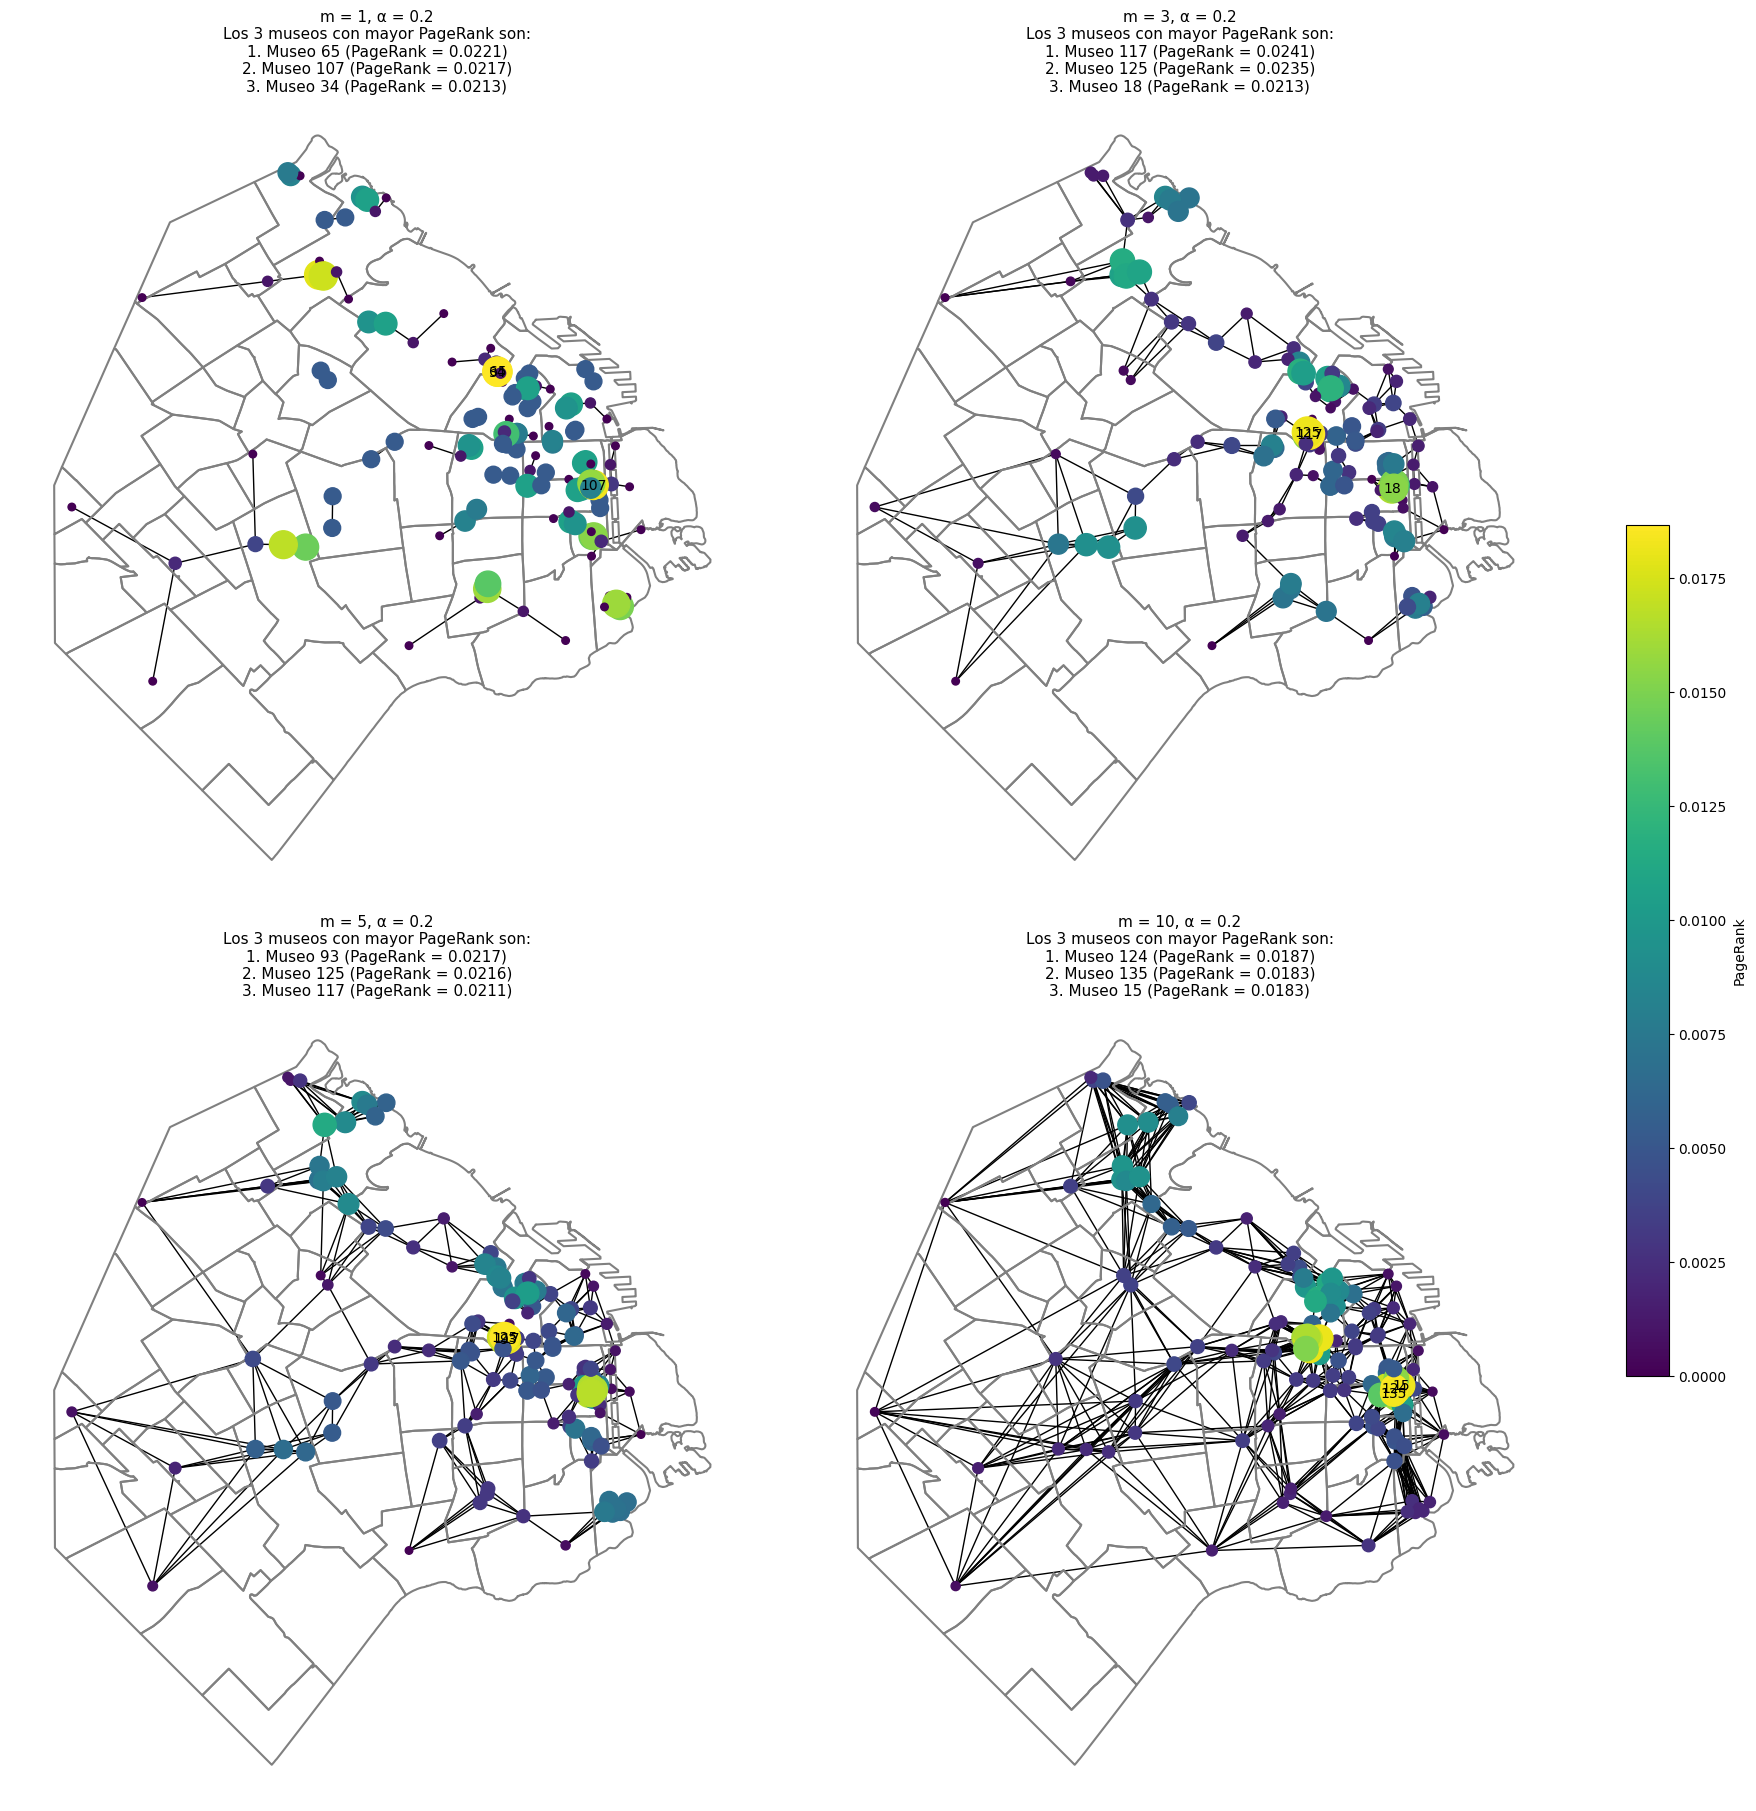

In [ ]:
from scipy.linalg import solve_triangular

# Configuramos la figura con 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 18), constrained_layout=True)
axs = axs.flatten()

# Aca variamos los datos, con m y alpha

valores_m = [1, 3, 5, 10] # Cantidad de links por nodo
alpha = 1/5 # Factor de amortiguamiento

for i, m in enumerate(valores_m):
    A = construye_adyacencia(D,m) # Construimos la matriz de adyacencia
    page_Rank = calcula_pagerank(A, alpha) # Realizamos el calculo
    page_Rank = page_Rank / np.sum(page_Rank) # Normalizamos para hacer mas viable la visualizacion

    # Construccion del Mapa sin nada:

    barrios.to_crs("EPSG:22184").boundary.plot(color='gray',ax=axs[i]) # Graficamos Los barrios

    # Armado del mapa

    factor_escala = 2e4  # Escalamos los nodos para que sean visibles "(esto puedo variar)" !!!

    # Construccion del mapa de redes
    G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia

    # Construimos un layout a partir de las coordenadas geográficas
    G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}


    Nprincipales = 3 # Cantidad de principales
    principales = np.argsort(page_Rank)[-Nprincipales:] # Identificamos a los N principales

    #3 museos principales

    top3 = "\n".join([
        f"{j+1}. Museo {idx} (PageRank = {page_Rank[idx]:.4f})"
        for j, idx in enumerate(principales[::-1]) # Invertir para mostrar en orden descendente
         ])

    labels = {n: str(n) if n in principales else "" for n in G.nodes} # Nombres para esos nodos


    # Graficamos red

    nx.draw_networkx(G,G_layout,
                 node_size = page_Rank*factor_escala,
                 node_color = page_Rank,
                 cmap = plt.cm.viridis,
                 ax=axs[i],
                 with_labels=False)
    nx.draw_networkx_labels(G, G_layout, labels=labels, font_size=10, font_color="k", ax = axs[i]) # Agregamos los nombres




    # Añadimos título y leyenda
    axs[i].set_title(f'm = {m}, α = {alpha}\nLos 3 museos con mayor PageRank son:\n{top3}', fontsize=11)
    axs[i].axis('off')

#creamos la barra de colores
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=page_Rank.max()))
sm._A = []
cbar = plt.colorbar(sm, ax=axs.tolist(), shrink=0.5)
cbar.set_label("PageRank")
plt.show()

###C)

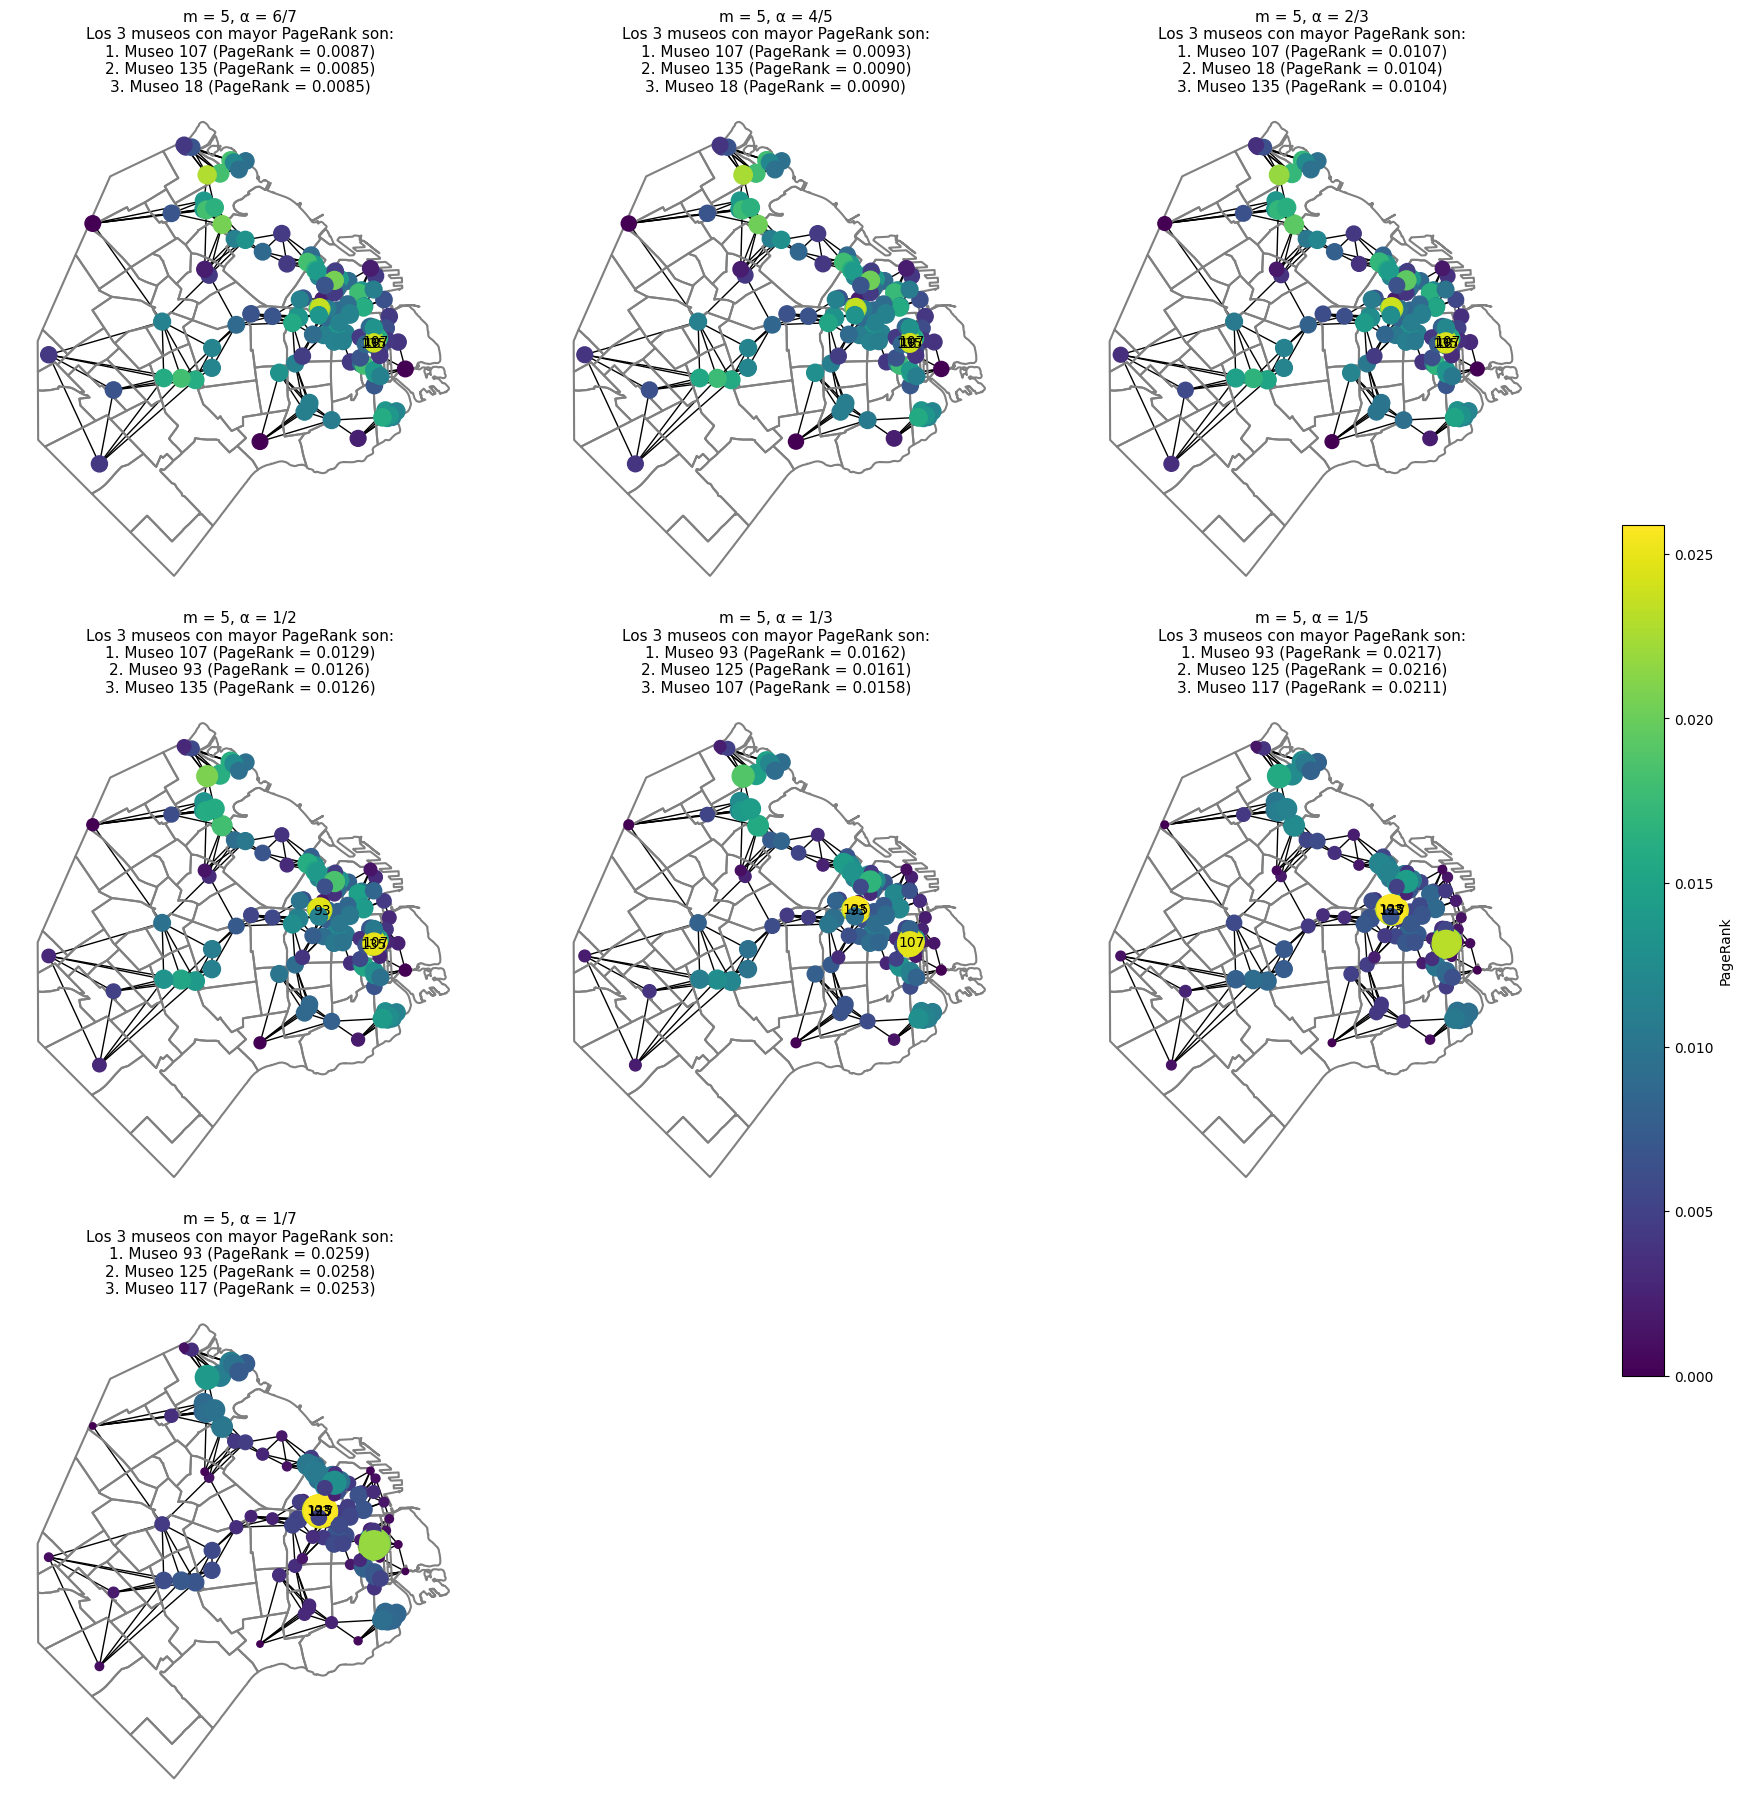

In [ ]:
#Ahora vamos a hacer lo mismo pero dejando m fijo (m=5) y variando el apha
from scipy.linalg import solve_triangular
import math

# Aca variamos los datos, con m y alpha

valores_alpha = [6/7, 4/5, 2/3, 1/2, 1/3, 1/5, 1/7]
fracciones_alpha = ['6/7', '4/5', '2/3', '1/2', '1/3', '1/5', '1/7'] # Para poder ponerlo como fraccion en el titulo
m = 5

n = len(valores_alpha)
columnas = 3
filas = math.ceil(n / columnas)

fig, axs = plt.subplots(filas, columnas, figsize=(6 * filas, 6 * columnas), constrained_layout=True)
axs = axs.flatten()

for i, alpha in enumerate(valores_alpha):
    A = construye_adyacencia(D,m) # Construimos la matriz de adyacencia
    page_Rank = calcula_pagerank(A, alpha) # Realizamos el calculo
    page_Rank = page_Rank / np.sum(page_Rank) # Normalizamos para hacer mas viable la visualizacion

    # Construccion del Mapa sin nada:
    # Configuramos la figura con 2x2 subplots

    barrios.to_crs("EPSG:22184").boundary.plot(color='gray',ax=axs[i]) # Graficamos Los barrios

    # Armado del mapa

    factor_escala = 2e4  # Escalamos los nodos para que sean visibles "(esto puedo variar)" !!!

    # Construccion del mapa de redes
    G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia

    # Construimos un layout a partir de las coordenadas geográficas
    G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}


    Nprincipales = 3 # Cantidad de principales
    principales = np.argsort(page_Rank)[-Nprincipales:] # Identificamos a los N principales

    #3 museos principales

    top3 = "\n".join([
        f"{j+1}. Museo {idx} (PageRank = {page_Rank[idx]:.4f})"
        for j, idx in enumerate(principales[::-1]) # Invertir para mostrar en orden descendente
         ])

    labels = {n: str(n) if n in principales else "" for n in G.nodes} # Nombres para esos nodos


    # Graficamos red

    nx.draw_networkx(G,G_layout,
                 node_size = page_Rank*factor_escala,
                 node_color = page_Rank,
                 cmap = plt.cm.viridis,
                 ax=axs[i],
                 with_labels=False)
    nx.draw_networkx_labels(G, G_layout, labels=labels, font_size=10, font_color="k", ax = axs[i]) # Agregamos los nombres

    # Añadimos título y leyenda
    axs[i].set_title(f'm = {m}, α = {fracciones_alpha[i]}\nLos 3 museos con mayor PageRank son:\n{top3}', fontsize=11)
    axs[i].axis('off')

# Eliminamos subplots vacíos (tenemos 9 y necesitamos 7)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

#creamos la barra de colores
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=page_Rank.max()))
sm._A = []
cbar = plt.colorbar(sm, ax=axs.tolist(), shrink=0.5)
cbar.set_label("PageRank")
plt.show()

###Aii)

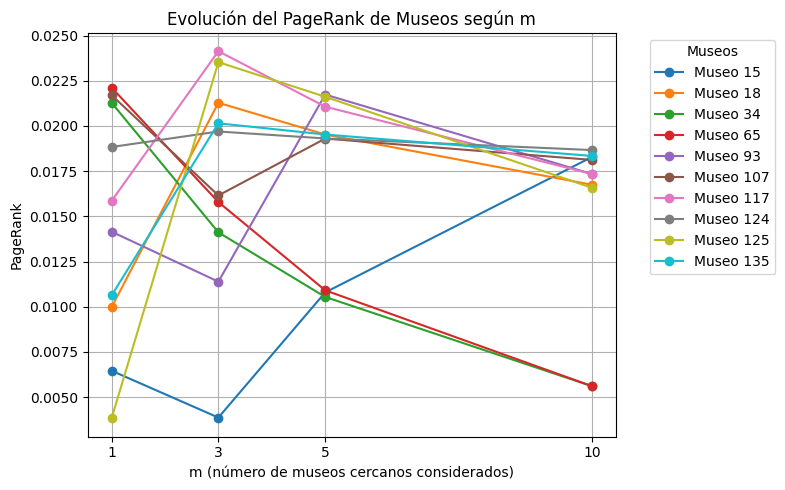

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#para este grafico vamos a dejar fijo el alpha y variamos el m
alpha = 1/5
m_values = [1, 3, 5, 10]

# incluimos todos los museos que aparecen alguna vez en el podio
id_museos_reales = np.array([
    15, 18, 34, 65, 93, 107, 117, 124, 125, 135
])

# Diccionario para guardar la evolución del PageRank
infopage_rank = {id_real: [] for id_real in id_museos_reales}

# Repetimos para cada valor de m
for m in m_values:
    A = construye_adyacencia(D, m)
    Page_Rank = calcula_pagerank(A, alpha)
    Page_Rank = Page_Rank / np.sum(Page_Rank)  # Normalización para visualización

    # Asociamos cada valor con su id_real
    for id_real in id_museos_reales:
        infopage_rank[id_real].append(Page_Rank[id_real])


# Graficamos la evolucion de page rank
plt.figure(figsize=(8, 5))

for museo_id, valores in infopage_rank.items():
    plt.plot(m_values, valores, marker='o', label=f'Museo {museo_id}')

plt.title('Evolución del PageRank de Museos según m')
plt.xlabel('m (número de museos cercanos considerados)')
plt.ylabel('PageRank')
plt.xticks(m_values) # usamos los valores m en el eje x
plt.grid(True)
# agregamos el titulo
plt.legend(title='Museos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

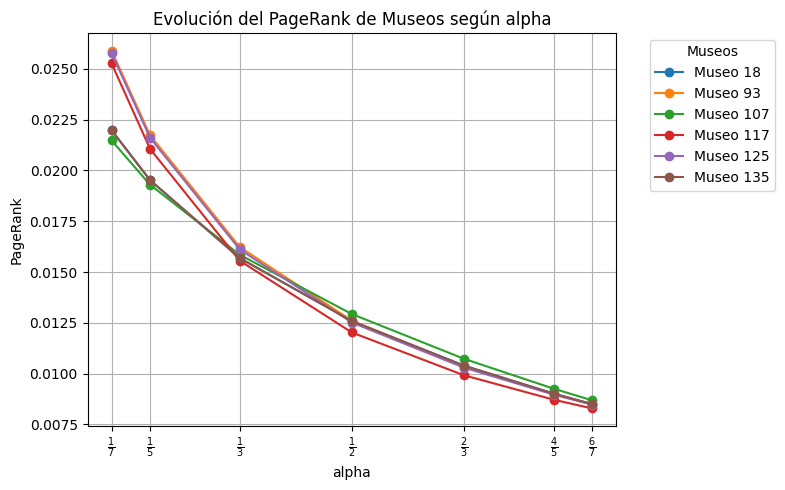

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fijamos m
m = 5

# Distintos valores de alpha
valores_alpha = [1/7, 1/5, 1/3, 1/2, 2/3, 4/5, 6/7]

# mostramos alpha como fracciones en el grafico
labels_frac = [r"$\frac{1}{7}$", r"$\frac{1}{5}$", r"$\frac{1}{3}$", r"$\frac{1}{2}$",
               r"$\frac{2}{3}$", r"$\frac{4}{5}$", r"$\frac{6}{7}$"]

# incluimos todos los museos que aparecen alguna vez en el podio
id_museos = np.array([18, 93, 107, 117, 125, 135])

# Diccionario para guardar la evolución del PageRank según alpha
infopage_rank = {id_real: [] for id_real in id_museos}

# Recorremos los valores de alpha
for alpha in valores_alpha:
    A = construye_adyacencia(D, m)  # m fijo
    Page_Rank = calcula_pagerank(A, alpha)
    Page_Rank = Page_Rank / np.sum(Page_Rank)  # Normalización

    # Asociamos cada valor con su id_real
    for id_real in id_museos:
        infopage_rank[id_real].append(Page_Rank[id_real])

# Graficamos la evolucion de page rank de cada museo mientras varia alpha
plt.figure(figsize=(8, 5))

for museo_id, valores in infopage_rank.items():
    plt.plot(valores_alpha, valores, marker='o', label=f'Museo {museo_id}')

plt.title('Evolución del PageRank de Museos según alpha')
plt.xlabel('alpha')
plt.ylabel('PageRank')
plt.xticks(valores_alpha, labels_frac)  # etiquetas como fracciones, usamos los valores de alpha en el eje x
plt.grid(True)
# agregamos el titulo
plt.legend(title='Museos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#B)

Para cada combinacion de parametros  (m y alpha)identificamos los 3 museos con mayor PageRank. Veamos que patrones pudimos encontrar para cada caso.

Al variar m, las posiciones en el ranking se vuelven altamente inestables. Para tomar un ejemplo, veamos que para m = 1, el museo 65 es el mas central,sin embargo no vuelve a estar incluido en el podio (seguir la funcion roja en el grafico de evolucion de pagerank  segun m). Por otro lado, con el museo 124 tenemos el mismo caso pero inverso. Toma posicion en el ranking cuando el m es mas alto.

Ante estas situaciones encontramos las siguientes explicaciones:

Los museos que aparecen en el podio para valores de m mas bajos deben tener conexiones con museos importantes (que tengan valor alto tambien). Entonces al tener menor cantidad de vecinos, lo que se valora es la calidad de ellos.

En cambio, los museos que toman importancia en el ranking cuando el m es mas alto, deben encontrarseen regiones con alta densidad de museos. Aqui la cantidad de conexiones tiene un rol mas significante que la calidad de ellas.

Por otro lado, al variar alpha las posiciones del ranking son mas estables. Hay museos que se mantienen en el podio (por ejemplo los museos: 93, 117, 125, 135). Observemos que a medida que aumentamos alpha, los museos localizados en zonas de alta densidad de museos toman mayor importancia. Esto es completamente logico, ya que si suponemos que se cortó la caminata aleatoria hay una mayor posiblidad de visitar un museo si este tiene una gran cantidad de conexiones.

Es importante destacar, que a medida que el alpha aumenta, los valores de PageRank generales, son mas bajos. Esto se debe a que al aumentar el alpha hay menos posibilidad de que los museos acumulen visitas, lo que genera que esten mayor distribuidas y en consecuencia el valor de PageRank tambien lo está y es mas bajo.

Teniendo todos estos factores en cuenta podemos concluir que, para un valor de m mas bajo, los museos con mayor pagerank son aquellos que tienen las conexiones de mayor calidad. Y para valores de m mas altos la cantidad de conexiones toma una mayor relevancia. En cambio para alpha, las posiciones son mas estables y los museos con mayor cantidad de museos vecinos son los que se mantienen en el ranking.


# Punto 4:

##Resolucion

El enunciado nos brinda informacion muy relevante a la hora de resolver el ejercicio. Sabemos que:

&nbsp;

$$ r \; = \; \text {cantidad de museos visitados por cada persona} \\[12pt]$$
$$ w \; = \; \text {vector que representa el numero total de visitantes de cada museo} \\ \; w_i \; = \; \text {cantidad de visitantes totales del museo } i \\[12pt]$$
$$ v \; = \; \text {numero de personas totales que inician en cada museo} \\ v_i \; = \; \text {numero de personas totales que inician en el museo } i \\[12pt]$$
$$ B \; = \; \sum_{k=0}^{r-1} C^k \\[12pt]$$
$$ C \; = \; \text{Matriz de Transiciones} \\[10pt]$$

En base al "Tip" del enunciado:

"si v da el número de visitantes que entraron a la red en cada museo, entonces luego de k pasos podemos esperar la distribución C^k·v sobre el total de museos"

Entonces,

&nbsp;

$$ v \; = \; \text {vector inicial de visitantes (r = 1)} \\[8pt]$$
$$ C \; \cdot \; v \; = \; \text{distribucion de viistantes tras un paso (r = 2)} \\[8pt]$$
$$ C \, ^2 \; \cdot \; v \; = \; \text{distribucion de viistantes tras dos pasos (r = 3)} \\[8pt]$$
$$ C \, ^{r-1} \; \cdot \; v \; = \; \text{distribucion de visitantes tras r - 1 pasos} \\[8pt]$$

Por lo tanto el numero de visitantes de $w$ sera la suma de todos estos vectores, llegando asi al numero total. De forma:

&nbsp;

$$ w \; = \; v \; + \; C \cdot v \; + \; C \, ^2 \cdot v \; + \; ... \; + \; C \, ^{r-1} \cdot v \; \\[8pt]$$
$$ \text {Esto puede ser escrito como:} \\[8pt]$$
$$ w \; = \; \left(\; I \; + \; C \; + \; C \, ^2 \; + \; ... \; + \; C \, ^{r-1}\; \right) \cdot v \\[8pt]$$
$$ w \; = \; (\; \sum_{k=0}^{r-1} C\,^k \; ) ⋅ v$$

Donde $I$ es la matriz identidad, por $C\, ^0$

Con la definicion de $B$ tenemos entonces que:

&nbsp;

$$ w \; = \; B \; \cdot \; v \\[10pt]$$

Despejamos para encontrar $v$ en terminos de $w$ tal que:

&nbsp;

$$ v \; = \; B \, ^{-1} \; \cdot \; w \\[8pt]$$

Demostrando entonces lo que nos pedian



# Punto 5:


--2025-06-05 18:00:12--  https://raw.githubusercontent.com/jerovernay/tp-Alc/refs/heads/main/codigo/Codigo_Estructura_TP1/visitas.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3400 (3.3K) [text/plain]
Saving to: ‘visitas.txt.1’

visitas.txt.1       100%[===================>]   3.32K  --.-KB/s    in 0s      

2025-06-05 18:00:12 (42.4 MB/s) - ‘visitas.txt.1’ saved [3400/3400]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Vector W :  [3866. 2310. 3922. 2942. 1932. 2779. 3209. 5472. 1862. 2501. 2218. 2575.
 2362. 3039. 2781. 3449. 3811. 3208. 4049. 3120. 1922. 3224. 2166. 2919.
 2731. 3053. 1275. 2659. 2073. 2873. 2620. 2185. 3097. 2773. 4572. 3800.
 2586. 1582. 2986. 2509. 3345. 3290. 3682. 3607. 2795. 2165. 288

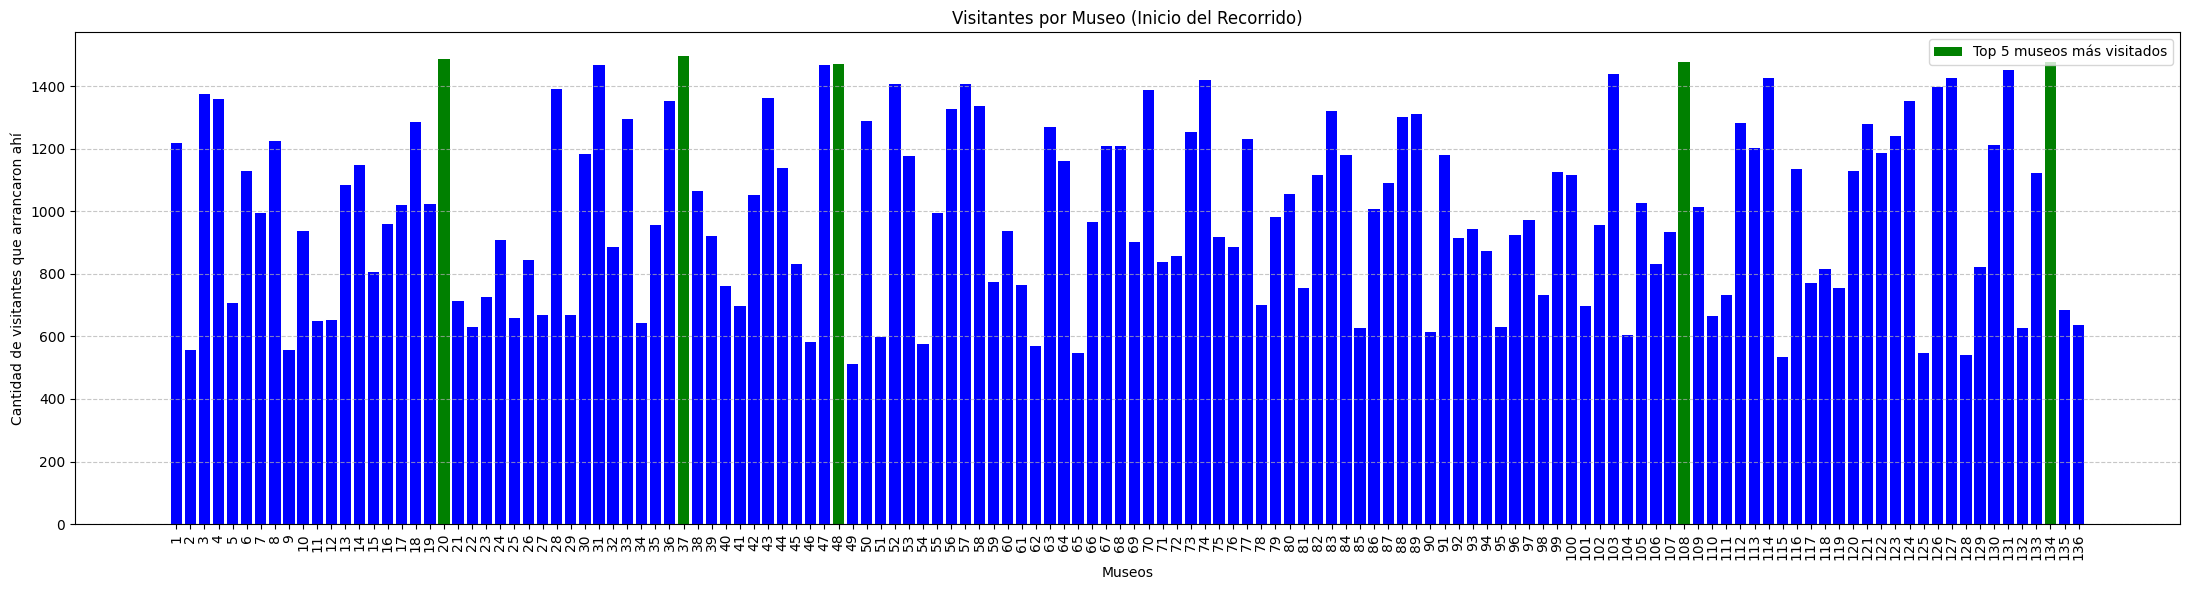



Los 5 museos más visitados son:
Museo 37: 1497 visitantes
Museo 20: 1486 visitantes
Museo 108: 1478 visitantes
Museo 134: 1477 visitantes
Museo 48: 1470 visitantes


In [ ]:
from matplotlib.patches import Patch
!wget https://raw.githubusercontent.com/jerovernay/tp-Alc/refs/heads/main/codigo/Codigo_Estructura_TP1/visitas.txt



%load_ext autoreload
%autoreload 2



W = np.loadtxt('visitas.txt')


r = 3
C = calcula_matriz_C_continua(D)
B = calcula_B(C,r)
B_inversa = inversa_por_lu(B)
V = B_inversa @ W


norma_V = norma1(V)

norma_W = norma1(W)


print("Vector W : ", W, '\n' )
print("Vector V : ", V ,'\n')
print("¿V <= W? :", (V <= W).all(), '\n') #Veo que todos los valores de V sean menores a los de W, como chequeo de que esten bien hechas las matrices
print("La norma 1 de V, es decir la cantidad total estimada de visitantes es :", norma_V,'\n' ) #Respuesta del Ejercicio



#Grafico de V#

# Crear los nombres de los museos como "Museo 0", "Museo 1", ..., "Museo 135"
museos = [f"{i + 1}" for i in range(len(V))]


# Identifico los índices de los 5 museos con más visitantes (como detalle)

top_5_indices = np.argsort(V)[-5:]

# Pongo color verde para los top 5

colores = ['blue'] * len(V)
for idx in top_5_indices:
    colores[idx] = 'green'  # Color verde para los top 5


# Graficar
plt.figure(figsize=(22, 6))
plt.bar(museos, V, color = colores)
plt.xlabel("Museos")
plt.ylabel("Cantidad de visitantes que arrancaron ahí")
plt.title("Visitantes por Museo (Inicio del Recorrido)")
plt.xticks(rotation=90)  # Rota etiquetas del eje X
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Rejilla en el eje Y


# Añadir leyenda
legend_elements = [
    Patch(facecolor='green', label='Top 5 museos más visitados')
]

plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()  # Ajusta los márgenes para que no se superpongan
plt.show()

print('\n')

# Mostramos cuáles son los 5 museos más visitados
print("Los 5 museos más visitados son:")
for idx in top_5_indices[::-1]:
    print(f"Museo {idx + 1}: {round(V[idx])} visitantes")

# Punto 6:

La ecuacion (6) del enunciado:

&nbsp;

$$ \frac{\|v - \tilde{v}\|_1}{\|v\|_1} \leq \text{cond}_1(B) \cdot \frac{\|w - \tilde{w}\|_1}{\|w\|_1} \\[10pt]$$

Nos dice que el error relativo de la solucion $v \,$ (el total de primeras visitas respectivamanete), esta acotado superiormente por el error relativo de los datos de $w \,$ multiplicado por el numero de condicion  $B \,$ de norma 1.

Como sabemos los datos de visitas tienen un error del 5% es decir:

&nbsp;
$$ \frac{\|w - \tilde{w}\|_1}{\|w\|_1} \; = \; 0.05\\[10pt] $$

Esto implica que el error relativo maximo de $v \,$ es:

&nbsp;
$$ v \; = \; \text{cond}_1(B) \cdot 0.05 \\[10pt]$$

Calculamos el numero de condicion de B y luego la cota para el error de estimacion de v.

Donde el numero de condicion esta dado por la formula:

&nbsp;
$$ \text{cond}_1(B) = \|B\|_1 \cdot \|B\;^{-1}\|_1$$

In [ ]:
from template_funciones_TP1 import nro_condicion_norma1

r = 3 # Calculamos sobre la misma cantidad que en el ejercicio 5
C = calcula_matriz_C_continua(D) # Hacemos C en base a lo obtenido del ejercicio y trabajamos con la matriz de distancias
B = calcula_B(C,r)

condB = nro_condicion_norma1(B)

print(condB * 0.05)


0.2525885588332503


# Comienzo TP2

# 1. Autovectores y autovalores de L y R

###a)

Mostremos que 1 es autovector de las matrices L y R. Para que resulte claro vamos a hacerlo en partes. Demostremos L y r por separado

Definimos $ 1\, =\, (1, 1, \dots, 1)\,^T \in \mathbb{R}^N$ el vector de unos.

&nbsp;

Veamos el caso de $L$

&nbsp;

$L$ la Matriz laplaciana: $\;L \, =\, K\, -\, A$

Donde:
- $A$ es una matriz simétrica
- $K$ es la matriz diagonal, con $K_{ii} = k_i = \sum_{j=1}^N A_{ij}\\[5pt]$

Entonces:

$$ L \cdot 1 = (\,K - A\,) \cdot \, 1 =\, K \cdot 1 - A \cdot 1 \\[5pt]$$
$$ K \cdot 1 \; = \;K_{ii} \;=\; k_i = \; \sum_{j=1}^{N} A_{ij} \; = \; \vec{k} \\[5pt]$$
$$ A \cdot 1 \; = \; \sum_{j=1}^{N} A_{ij} \; = \; k_i \; = \; \vec{k} \\[5pt]$$

Por lo tanto:

$$ L \cdot 1 = \vec{k} - \vec{k} = 0 = 0 \cdot 1 \\[5pt]$$

Como sabemos que:
$$ L \cdot 1 \; = \; \lambda \cdot 1 \\[2pt]$$
**Podemos decir que $\,1\,$ es autovector de $\,L\,$ con autovalor $\lambda \, =\, \,0\,$.**

&nbsp;

Vamos el caso de $R$

&nbsp;

Donde:
$$ R \, = \,  A - P \\[5pt]$$
$$P_{ij} = \frac{k_i k_j}{2E} \; , \quad \text{con } 2E \; =\; \sum_{i=1}^N \sum_{j=1}^N A_{ij}$$

Entonces:

$$ R \cdot 1 \;=\; (A - P) \cdot 1 \;=\; A \cdot 1 \, -\, P \cdot 1 \\[5pt]$$

Vimos que $A \cdot 1 \;=\; \vec{k}\,$. Veamos ahora $P \cdot 1\,$:

$$ (P \cdot 1)\,_i \,=\; \sum_{j=1}^N P_{ij} \;=\; \sum_{j=1}^N \frac{k_i k_j}{2E} \;=\; \frac{k_i}{2E}\, \sum_{j=1}^N k_j \\[5pt]$$
$$ \text {Recuerdo que: } \, \sum_{i=1}^N k_i \, = \, \sum_{i=1}^N \sum_{j=1}^N A_{ij} \, = \, 2E \\[5pt]$$
$$ \frac{k_i}{2E}\, \sum_{j=1}^N k_j \,⇒\, \frac{k_i}{2E} \cdot 2E = k_i \\[5pt]$$


Por lo visto mas arriba $\,k_i\,$ = $\,\vec{k}\,$:

$$ P \cdot \mathbf{1} = \vec{k} \Rightarrow R \cdot 1 = \vec{k} - \vec{k} = 0 = 0 \cdot 1 $$

**Podemos decir que $\,1\,$ es autovector de $\,R\,$ con autovalor $\lambda \, = \, \,0\,$.**

&nbsp;

**¿Y que agrupacion de la red representa?**


El vector 1 representa la particion de un grupo unico, es decir de ninguna particion. Todos los nodos pertenecen al mismo grupo




###b)
Muestren que si $L$ ($R$) tienen dos autovectores $v_1$ y $v_2$ asociados a autovalores
$λ_1 \neq λ_2$, entonces $v_1^{t} \,v_2\,$ = $\,0 \\[2pt]$

Nosotros sabemos que ambos $L$ y $R$ son simetricas por enunciado.
Como es simetrica, es diagonalizable, esto quiere decir que existe una base ortonormal de autovectores asociados a autovalores distintos, tanto para $L$ y $R$ como para cualquier matriz simetrica$.\\[2pt]$

Haciendo uso del "Tip", usaremos una matriz cuadrada $M$ generica, porque para mostrar lo que nos piden, no es necesario el contenido especifico de $L$ y $R. \\[2pt]$

Tenemos:

$$ M \; \text {es simetrica} \quad ⇒ \quad M^{t} \, = \, M\\[4pt]$$
$$ M v_1 \, = \, \lambda_1 v_1 \\[4pt]$$
$$ M v_2 \, = \, \lambda_2 v_2 \\[4pt]$$
$$ \lambda_1 \, \neq \, \lambda_2 \\[2pt]$$

Resolvamos usando la primera igualdad:

&nbsp;

$$ M v_1 \, = \, \lambda_1 v_1 \quad ⇒ \quad \text {multiplico por} \;v_2\,^t\; \text {en ambos lados}  \quad \Rightarrow \quad v_2\,^t \, M v_1 \, = \, v_2\,^t \lambda_1 v_1 \\[1pt]$$
$$\text {Sabiendo que (} (Mv_2)\,^{t} \, = \, v_2\,^t \, M  \, \text {), traspongo ambos lados}\quad ⇒ \quad (v_2\,^t \, M v_1)\,^t \, = \, (v_2\,^t \lambda_1 v_1)\,^t  \\[1pt]$$
$$ v_1\,^t \, M v_2 \, = \, v_1\,^t \,λ_1 v_2 \quad ⇒ \quad \text {Como: }\, M v_2 \, = \, \lambda_2 v_2 \quad ⇒ \quad  \lambda_2 v_2 \, v_1\,^t \, = \, λ_1 v_2 \, v_1\,^t \\[1pt]$$
$$ ⇒ \quad (\lambda_2 \,-\, \lambda_1)\; v_2 v_1\,^t \; =\; 0 \quad \text {;} \;\text { pero } \; \lambda_1 \, \neq \, \lambda_2 \\[3pt]$$

Por lo tanto:
$$ v_1\,^t v_2 \;=\; 0 \quad \quad \text {como queriamos probar}$$

###c)

Muestren si $v$ es un autovector de autovalor $\lambda \neq 0$ de $R$ o $L\,$, entonces $\sum_i^N v_i = 0.$

Recordemos que:

- Al probar a), sabemos que 1 es autovector de L y R asociado al autovalor $\lambda = 0$.

- Al probar b) vimos que en toda matriz simetrica ($L$ y $R$ ambas simetricas) hay una base ortonormal de autovectores asociados a autovalores distintos, tal que $v_1\,^t \,v_2 = 0$

- Se que si tengo dos vectores $v,w \in \mathbb{R}^n$, su producto escalar puede escribirse como: $v^t w \; = \; \sum_{i=1}^N v_i w_i$

&nbsp;

Teniendo esto aclarado, resolvamos:

&nbsp;

$$ v \perp 1 \quad \text {donde 1 es el vector (1, … ,1)} \\[3pt]$$
$$⇒ \quad v_1\,^t 1  =  0 \quad ⇔ \quad \sum_{i=1}^N v_i \; 1 \; = \; 0 \quad \Leftrightarrow \quad \sum_{i=1}^N v_i \; = \; 0$$


#2. Extensiones del metodo de la potencia

Consideren una matriz $M ∈ R^{n×n}$ diagonalizable con autovalores $λ_1 ≥ λ_2 ≥ · · · ≥ λ_n\,$, y autovector $v_i$ asociado a $λ_i$

## a. Shifting de autovalores:
Muestre que los autovalores de $M + μI$ son $γ_i = λ_i + μ\,$,
y que el autovector asociado a $γ_i$ es $v_i$. Concluya que si $μ + λi \neq 0 \; ∀i \,$, entonces $M + μI$ es inversible.

&nbsp;

Demostremoslo por partes.
- I) Muestre que los autovalores de $M + μI$ son $γ_i = λ_i + μ\,$,
y que el autovector asociado a $γ_i$ es $v_i$.
- II) Concluya que si $μ + λi \neq 0 \; ∀i \,$, entonces $M + μI$ es inversible.

&nbsp;

$I) \\[3pt]$
$$\text {Se que: } \; M v_i \, = \, \lambda_i v_i \; ⇒ \; (M + \mu I) v_i \; =\; (M + \mu) v_i \; =\; Mv_i + \mu v_i \; = \; \lambda_i v_i + \mu v_i \; =\; (\lambda_i + \mu)v_i\\[2pt]$$
$$ \Rightarrow \quad \text {Si:}\quad \gamma_i = λ_i + μ \quad ⇒ \quad (\lambda_i + \mu)\,v_i \; = \; \gamma_i v_i \quad ⇒ \quad \text {Entonces: } \quad (M + \mu I) v_i \; = \; \gamma_i v_i \\[6pt]$$

Demostrando entonces que los autovalores de $M + μI$ son $γ_i = λ_i + μ\,$,
y que el autovector asociado a $γ_i$ es $v_i$.

&nbsp;

$II) \\[3pt]$

$$\text {Una matriz es inversible} \quad ⇔ \quad \text {Todos sus autovalores son distintos de cero} \\[2pt]$$

Por lo tanto:

$$ M + μI \;\text {tiene inversa} \quad ⇔ \quad μ + λi \; = \; \gamma_i \; \neq \; 0 \quad∀i$$

&nbsp;

## b. Metodo de la potencia inverso:

Considerando $μ > 0\,$, muestren que $L + μI$ es inversible, con L el laplaciano definido en la ecuacion 2 $(L = K - A)$. Muestren que aplicar el
metodo de la potencia a $(L + μI)^{−1}$ converge a su autovector de autovalor mas chico si se parte de una semilla adecuada. Indique, en el caso de que hay solo un autovector con dicho autovalor, cual es dicho autovector y cuanto vale su autovalor.

&nbsp;

Resolvamos de una manera similar al a. , dividamos por partes asi queda todo mas claro

- I) Considerando $μ > 0\,$, muestren que $L + μI$ es inversible, con L el laplaciano definido en la ecuacion 2 $(L = K - A)$.
-  II) Muestren que aplicar el metodo de la potencia a $(L + μI)^{−1}$ converge a su autovector de autovalor mas chico si se parte de una semilla adecuada.
- III) Indique, en el caso de que hay solo un autovector con dicho autovalor, cual es dicho autovector y cuanto vale su autovalor.

&nbsp;

$ I) \\[3pt]$
$$ \text {1a) nos dice que: } \; \lambda \, = \, 0 \; \text {esta asociado al autovector} \; 1 \;(1^t = (1, \dots ,1)) \quad \text {en L y R} \\[2pt]$$
$$\text {Por dato de enunciado, } \; \mu > 0 \; \text {, haciendo que} \; L + μI \; \text {sea inversible.} \\[2pt]$$
$$ \text {Esto ocurre por lo demostrado en el enunciado anterior (2a), donde los autovalores de} \; M + μI \; \text {son}\; γ_i = λ_i + μ \\[2pt]$$
$$\text {Si suponemos que los autovalores de L: } \; |λ_1| ≥ |λ_2| ≥ · · · ≥ |λ_n|\, \quad ⇒ \quad \lambda_n \, =\, 0 \\[2pt]$$
$$\text {Entonces: } \; \lambda_n + \mu \; = \; \gamma_n \; \neq \; 0 \; (\text {si} \; \mu > 0)\\[2pt]$$
$$\text {Por lo tanto: }\; |\gamma_1 | \geq \dots \geq |\gamma_n| > 0 \; \text {todos sus autovalores son distintos de cero} \quad \Rightarrow \quad L + μI \; \text {es inversible} \\[6pt]$$

Demostrando lo que pedian

&nbsp;

$II) \\[3pt]$

Definiendo semilla como el vector inicial $x_0$. Podemos decir que con una semilla adecuada, el metodo de la potencia va a converger mas rapido al autovector dominante o al autovector asociado al valor mas chico en el caso del metodo de la potencia inverso. Esto va a ocurrir siempre que el vector inicial tenga una componenente no nula en la direccion de ese autovector.

&nbsp;

$$\text {Por el metodo de la potencia, sabemos que: } \; \lim_{k \to \infty} X^k \; = \; (\frac {\lambda_1}{|\lambda_1|})^k \; (\frac {\alpha v_1}{||\alpha v_1||})\\[2pt]$$
$$\text {Donde} \; X^k \; \text {converge a la direccion del autovector dominante}\\[2pt]$$
$$\text {En el caso del metodo de la potencia inverso, se converge al auotvector asociado al autovalor mas chico}\\[2pt]$$
$$\text {Donde para: } \; M \in \mathbf{R}^{nxn} \quad  |\lambda_1| \geq \dots \geq |\lambda_n| \; \text {, pero en } \; M^{-1} \quad |\frac {1}{\lambda_1} |\leq \dots \leq |\frac {1}{\lambda_n}|\\[2pt]$$
$$\text {Reaclacando que: } \; Mv_1 \,=\, \lambda_1 v_1 \Rightarrow M^{-1}v_1 \, = \, \frac{1}{\lambda_1} v_1$$

Por lo tanto: $\\[3pt]$

$$\text {Sabiendo que los autovectores de L y de } \; (L + μI)^{-1} \; \text {son los mismos, ya que varian los autovalores} \\[2pt]$$
$$\text {Los autovalores de} \; (L + μI)^{−1} \; \text {son:} \; \frac{1}{\lambda_i + \mu} \\[4pt]$$

Si aplicamos el metodo de la potencia, por lo aclarado antes, el autovector al que primero converge si $\lambda_i + \mu > 0 \;$ (tal que sus autovalores $\,, \frac{1}{\lambda_i + \mu}\;$) es el asociado al autovalor $\lambda_i$ mas chico.

&nbsp;

$III) \\[3pt]$

Si bien indirectamente lo mencionamos en el $I)\,$, el autovector asociado al autovalor mas chico de $L$ es 1, con autovalor 0. Por lo tanto, $(L + μI)^{−1}$ tiene como autovalor dominante a $\frac{1}{\mu}$ asociado al mismo autovector 1.

Apoyandonos en el grafico de la Figura 1 que nos brinda el TP, sabemos que el grafo es conexo. Gracias a esto sabemos que $\lambda \, = \, 0$ es simple y por tanto su autovector asociado 1 es unico.

## c. Deflacion de Hotelling.
Suponiendo que $M$ es simetrica (y por lo tanto admite una base ortogonal de autovectores), muestre que la matriz $\hat M - λ_1 \frac{v_1 v^t_1}{v^t_1 v_1}$ tiene los mismos autovectores que $M$ , pero el autovalor asociado a $v_1$ es igual a cero

&nbsp;


- Si $M$ es simetrica, entonces existe una base ortonormal {$v_1, v_2, \dots , v_n$} de autovectores
- Si sus autovalores son distintos tal que : $λ_1 ≥ λ_2 ≥ · · · ≥ λ_n\,$

Entonces la matriz $M \; = \; \hat M \, - λ_1 \frac{v_1 v^t_1}{v^t_1 v_1}$ tiene los mismos autovectores pero el autovalor de $v_1$ (en este caso, el que elijamos en si) pasa a ser 0.

$\\[2pt]$

Veamoslo:

&nbsp;

$$\text {Sabemos que: } \; Mv_1 \, = \, \lambda_1 v_1 \quad \text {y} \quad M \, = \, \hat M \\[2pt]$$
$$ M v_1 \, = \, (\hat M -  λ_1 \frac{v_1 v^t_1}{v^t_1 v_1}) v_1 \\[2pt]$$
$$ ⇒ \quad M v_1 \, = \, \hat M v_1 \, - \, \frac{\lambda_1 v_1 v^t_1 v_1}{v^t_1 v_1}  \\[2pt]$$
$$\text {Como: } \; v^t_1 v_1 \; = \; || v_1 ||_2 \; =\; 1 \quad \text {por ser una b.o.n}\\[2pt]$$
$$ \Rightarrow \quad M v_1 \, = \, \hat M v_1 \, - \, \frac{\lambda_1 v_1 ||v_1||}{||v_1||}\\[2pt]$$
$$\Rightarrow \quad M v_1 \, = \, \hat M v_1 \, - \, \lambda_1 v_1 \quad \Rightarrow \quad M v_1 \, = \, \lambda_1 v_1 \, -\, \lambda_1 v_1 \; = \; 0\\[4pt]$$

**Es decir el nuevo autovalor asociado a $v_1$ es $0$**

&nbsp;

Teniendo en cuenta lo que sabiamos previamente, para mostrar que el resto de autovectores siguen siendo iguales, basta mostrarlo de esta manera:

&nbsp;

$$v_i \perp v_j \quad \text {si:} \; i \neq j\\[2pt]$$
$$ M v_j \, = \, (\hat M -  λ_1 \frac{v_1 v^t_1}{v^t_1 v_1}) v_j\\[2pt]$$
$$ ⇒ \quad M v_j \, = \, \hat M v_j \, - \, \frac{\lambda_1 v_1 v^t_1 v_j}{v^t_1 v_1}\\[2pt]$$
$$⇒ \quad M v_j \, = \, \hat M v_j \, - \frac {\lambda_1 v_i \, 0}{||v_1||_2} \\[2pt]$$
$$⇒ \quad M v_j \, = \, \hat M v_j \, - \frac {0}{1} \\[2pt]$$
$$⇒ \quad M v_j \, = \, \hat M v_j \quad ⇒ \quad M v_j \, = \, \lambda_j v_j\\[5pt]$$

**Por lo tanto, cada $v_j$ con $j \neq 1$ sigue siendo el mismo autovector asociado al autovalor $\lambda_j$**



#3. Implementacion Computacional

#a)

i)  *Calcula_L*(A) y *Calcula_R*(A)

In [ ]:

def A_sim(A):  # calculo para simetrizar red de adyacencia
    A_Traspuesta = A.T

    if np.allclose(A, A_Traspuesta):
      return A
    else:
      return np.ceil((A + A_Traspuesta) / 2 )



def calcula_L(A): # L = K - A
    A = A_sim(A)
    K = crearK(A)
    return K - A

#

def calcular_2E(A,n): # calculo de 2E a partir de sumatorias de casilleros de A
    dosE = 0

    for i in range(n):
      for j in range(n):
        dosE += A[i,j]

    return dosE


def crear_P(A,n):  # armado de P a partir de P[i,j] = (k[i] * k[j] ) / 2E
    dosE = calcular_2E(A,n)
    P = np.zeros((n,n))
    k = np.diag(crearK(A))


    for i in range(n):
      for j in range(n):
        P[i,j] = (k[i] * k[j] ) / dosE

    return P



def calcula_R(A): # R = A - P
    A = A_sim(A)
    n = A.shape[0]
    P = crear_P(A,n)

    return A - P


ii) *calcula_labda*(L,v) y *calcula_Q*(R,v)

In [ ]:
def calcula_Lambda(L,v):
    s = np.sign(v)           # s[i] = signos de la posicion i del autovector del segundo menor autovalor de L

    return 0.25 * s.T @ L @ s

def calcula_Q(R,v):
    s = np.sign(v)          # s[i] = signos de la posicion i del autovector del mayor autovalor de R

    return s.T @ R @ s

# Matriz A del enunciado
A_ejemplo = np.array([
    [0, 1, 1, 1, 0, 0, 0, 0],
    [1, 0, 1, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 1, 0, 0],
    [1, 1, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 1, 1],
    [0, 0, 1, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 0, 1, 1, 1, 0]
])

L = calcula_L(A_ejemplo)
R = calcula_R(A_ejemplo)


autovalores_L, autovectores_L = np.linalg.eigh(L)
autovalores_R, autovectores_R = np.linalg.eigh(R)

v_L = autovectores_L[:, 1]
v_R = autovectores_R[:, -1]

lamb = calcula_Lambda(L, v_L)
Q = calcula_Q(R, v_R)

print("lambda: ",lamb)
print("Q: ",  Q)

lambda:  2.0
Q:  20.0


#b)

i)

In [ ]:
def metpot1(M, niter=10000, tol=1e-8 ):
    n = M.shape[0]
    v_sin_normalizar = np.random.uniform(-1, 1, size=n)
    v = v_sin_normalizar / np.linalg.norm(v_sin_normalizar, 2)      #agarrmamos un vector para inicalizar el metodo

    for i in range(niter):
      v_viejo = v.copy()

      Mv = M @ v_viejo

      v = Mv / np.linalg.norm(Mv, 2)   #movemos el vecotr al multiplicar por A

      if np.linalg.norm(v - v_viejo) < tol:  #si la diferencia es insignificante salimos del ciclo y nos quedamos con el ultimo autovector con diferencia significante
        break

    autovalor_1 = (v.T @ M @ v) / (v.T @ v)
    autovector_1 = v

    return autovalor_1 , autovector_1


ii)

In [ ]:
def deflaciona(M):
    a_1, v_1 = metpot1(M)
    v_1_norm_a_2 = v_1.T @ v_1
    M1 = M - a_1 * ( np.outer(v_1, v_1) / v_1_norm_a_2 ) # deflaciona M

    return M1 , a_1, v_1

iii)

In [ ]:
def metpotI(M, mu, niter=10000, tol=1e-8):
    n = M.shape[0]
    I = np.eye(n)
    B = M + mu * I
    Binv = inversa_por_lu(B)
    a, v = metpot1(Binv)
    return a, v

iv)

In [ ]:
def metpotI2(M, mu, niter=10000, tol=1e-8):
     # Recibe la matriz A, y un valor mu y retorna el segundo autovalor y autovector de la matriz A,
   # suponiendo que sus autovalores son positivos excepto por el menor que es igual a 0
   # Retorna el segundo autovector, su autovalor, y si el metodo llegó a converger.
   n = M.shape[0]
   I = np.eye(n)
   B = M + mu * I
   Binv = inversa_por_lu(B)
   defBinv, _, _ = deflaciona(Binv) # La deflacionamos la inversa para obviar el autovalor de menor modulo y buscar el segundo
   a, v =  metpot1(defBinv) # Buscamos su segundo autovector
   a = 1/a # Reobtenemos el autovalor correcto
   a -= mu
   return a, v

***Resolucion***

In [ ]:
_ , v_segundo_menor = metpotI2(L, 0.5)
_ , v_mayor = metpot1(R)

print("Segundo menor autovector de L: ", v_segundo_menor)
print("\n")
print("mayor autovector R: ", v_mayor)
print("\n")
print("s de L: ", np.sign(v_segundo_menor))
print("\n")
print("s de R: ", np.sign(v_mayor))

Segundo menor autovector de L:  [ 0.4253254   0.4253254   0.26286555  0.26286555 -0.26286556 -0.26286556
 -0.42532541 -0.42532541]


mayor autovector R:  [-0.39410272 -0.39410272 -0.30770611 -0.3077061   0.3077061   0.30770611
  0.39410272  0.39410272]


s de L:  [ 1.  1.  1.  1. -1. -1. -1. -1.]


s de R:  [-1. -1. -1. -1.  1.  1.  1.  1.]


#C)

i)

In [ ]:

def laplaciano_iterativo(A,niveles,nombres_s=None):
    # Recibe una matriz A, una cantidad de niveles sobre los que hacer cortes, y los nombres de los nodos
    # Retorna una lista con conjuntos de nodos representando las comunidades.
    # La función debe, recursivamente, ir realizando cortes y reduciendo en 1 el número de niveles hasta llegar a 0 y retornar.
    if nombres_s is None: # Si no se proveyeron nombres, los asignamos poniendo del 0 al N-1
        nombres_s = range(A.shape[0])
    if A.shape[0] == 1 or niveles == 0: # Si llegamos al último paso, retornamos los nombres en una lista
        return([nombres_s])
    else: # Sino:
        L = calcula_L(A) # Recalculamos el L
        a_L, v_L = metpotI2(L, 0.5) # Encontramos el segundo autovector de L
        s = np.sign(v_L)
        indices_pos = np.where(s >= 0)[0]
        indices_neg = np.where(s < 0)[0]

        if len(indices_pos) == 0 or len(indices_neg) == 0:
              return ([nombres_s])
        # Recortamos A en dos partes, la que está asociada a el signo positivo de v y la que está asociada al negativo
        Ap = A[np.ix_(indices_pos, indices_pos)] # Asociado al signo positivo
        Am = A[np.ix_(indices_neg, indices_neg)] # Asociado al signo negativo

        return(
                laplaciano_iterativo(Ap,niveles-1,
                                     nombres_s=[ni for ni,vi in zip(nombres_s,v_L) if vi >= 0])
                +
                laplaciano_iterativo(Am,niveles-1,
                                     nombres_s=[ni for ni,vi in zip(nombres_s,v_L) if vi < 0])
                )

A = np.array([
    [0, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 0]
])


comunidades = laplaciano_iterativo(A, 2)
print("Comunidades:", comunidades)

Comunidades: [[4, 5], [6, 7], [3], [0, 1, 2]]


ii)

In [ ]:
def modularidad_iterativo(A=None,R=None,nombres_s=None):
    # Recibe una matriz A, una matriz R de modularidad, y los nombres de los nodos
    # Retorna una lista con conjuntos de nodos representando las comunidades.

    if A is None and R is None:
        print('Dame una matriz')
        return(np.nan)
    if R is None:
        R = calcula_R(A)
    if nombres_s is None:
        nombres_s = range(R.shape[0])
    # Acá empieza lo bueno
    if R.shape[0] == 1: # Si llegamos al último nivel
        return [nombres_s]
    else:
        a,v = metpot1(R) # Primer autovector y autovalor de R
        s = np.sign(v)
        indices_pos = np.where(s >= 0)[0]
        indices_neg = np.where(s < 0)[0]
        # Modularidad Actual:
        Q0 = np.sum(R[v>0,:][:,v>0]) + np.sum(R[v<0,:][:,v<0])
        if Q0<=0 or all(v>0) or all(v<0): # Si la modularidad actual es menor a cero, o no se propone una partición, terminamos
            return [nombres_s]
        else:
            ## Hacemos como con L, pero usando directamente R para poder mantener siempre la misma matriz de modularidad
            Rp = R[np.ix_(indices_pos, indices_pos)] # Parte de R asociada a los valores positivos de v
            Rm = R[np.ix_(indices_neg, indices_neg)] # Parte asociada a los valores negativos de v
            ap,vp = metpot1(Rp) # autovector principal de Rp
            am,vm = metpot1(Rm) # autovector principal de Rm

            # Calculamos el cambio en Q que se produciría al hacer esta partición
            Q1 = 0
            if not all(vp>0) or all(vp<0):
               Q1 = np.sum(Rp[vp>0,:][:,vp>0]) + np.sum(Rp[vp<0,:][:,vp<0])
            if not all(vm>0) or all(vm<0):
                Q1 += np.sum(Rm[vm>0,:][:,vm>0]) + np.sum(Rm[vm<0,:][:,vm<0])
            if Q0 >= Q1: # Si al partir obtuvimos un Q menor, devolvemos la última partición que hicimos
                return([[ni for ni,vi in zip(nombres_s,v) if vi>0],[ni for ni,vi in zip(nombres_s,v) if vi<0]])
            else:
                # Sino, repetimos para los subniveles
                return(
                    modularidad_iterativo(
            A[np.ix_(indices_pos, indices_pos)],
            R=Rp,
            nombres_s=[nombres_s[i] for i in indices_pos])
                    +
                    modularidad_iterativo(
            A[np.ix_(indices_neg, indices_neg)],
            R=Rm,
            nombres_s=[nombres_s[i] for i in indices_neg])
                )

comunidades_R = modularidad_iterativo(A)
print("Comunidades_R:", comunidades_R)

Comunidades_R: [[0, 1, 2, 3], [4, 5, 6, 7]]


# Vuelta a la red de los museos...


Los resultados del laplaciano son : {'laplaciano': {3: [[7, 20, 31, 33, 36, 37, 41, 44, 45, 46, 51, 54, 58, 60, 62, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 81, 90, 91, 92, 93, 94, 95, 96, 97, 99, 100, 101, 102, 103, 104, 106, 108, 109, 110, 111, 112, 114, 117, 119, 120, 121, 122, 125, 127, 132, 134], [0, 2, 5, 9, 10, 12, 13, 14, 15, 16, 18, 21, 23, 32, 35, 38, 40, 43, 47, 48, 56, 59, 61, 63, 66, 78, 83, 98, 105, 107, 115, 116, 118, 123, 124, 128, 129, 133, 135], [1, 8, 19, 26, 27, 28, 29, 30, 49, 50, 52, 53, 55, 57, 77, 79, 80, 82, 84, 85, 113], [3, 4, 6, 11, 17, 22, 24, 25, 34, 39, 42, 65, 86, 87, 88, 89, 126, 130, 131]], 5: [[3, 4, 6, 11, 17, 22, 24, 25, 34, 39, 42, 49, 65, 82, 85, 86, 87, 88, 89, 126, 130, 131], [1, 8, 19, 20, 26, 27, 28, 29, 30, 33, 36, 37, 44, 50, 52, 53, 55, 57, 60, 67, 75, 76, 77, 79, 80, 81, 84, 90, 91, 93, 94, 95, 96, 103, 104, 108, 110, 111, 113, 117, 122, 125, 132, 134], [7, 31, 45, 46, 54, 62, 64, 68, 69, 70, 71, 72, 73, 74, 99, 100, 101, 102, 106, 109

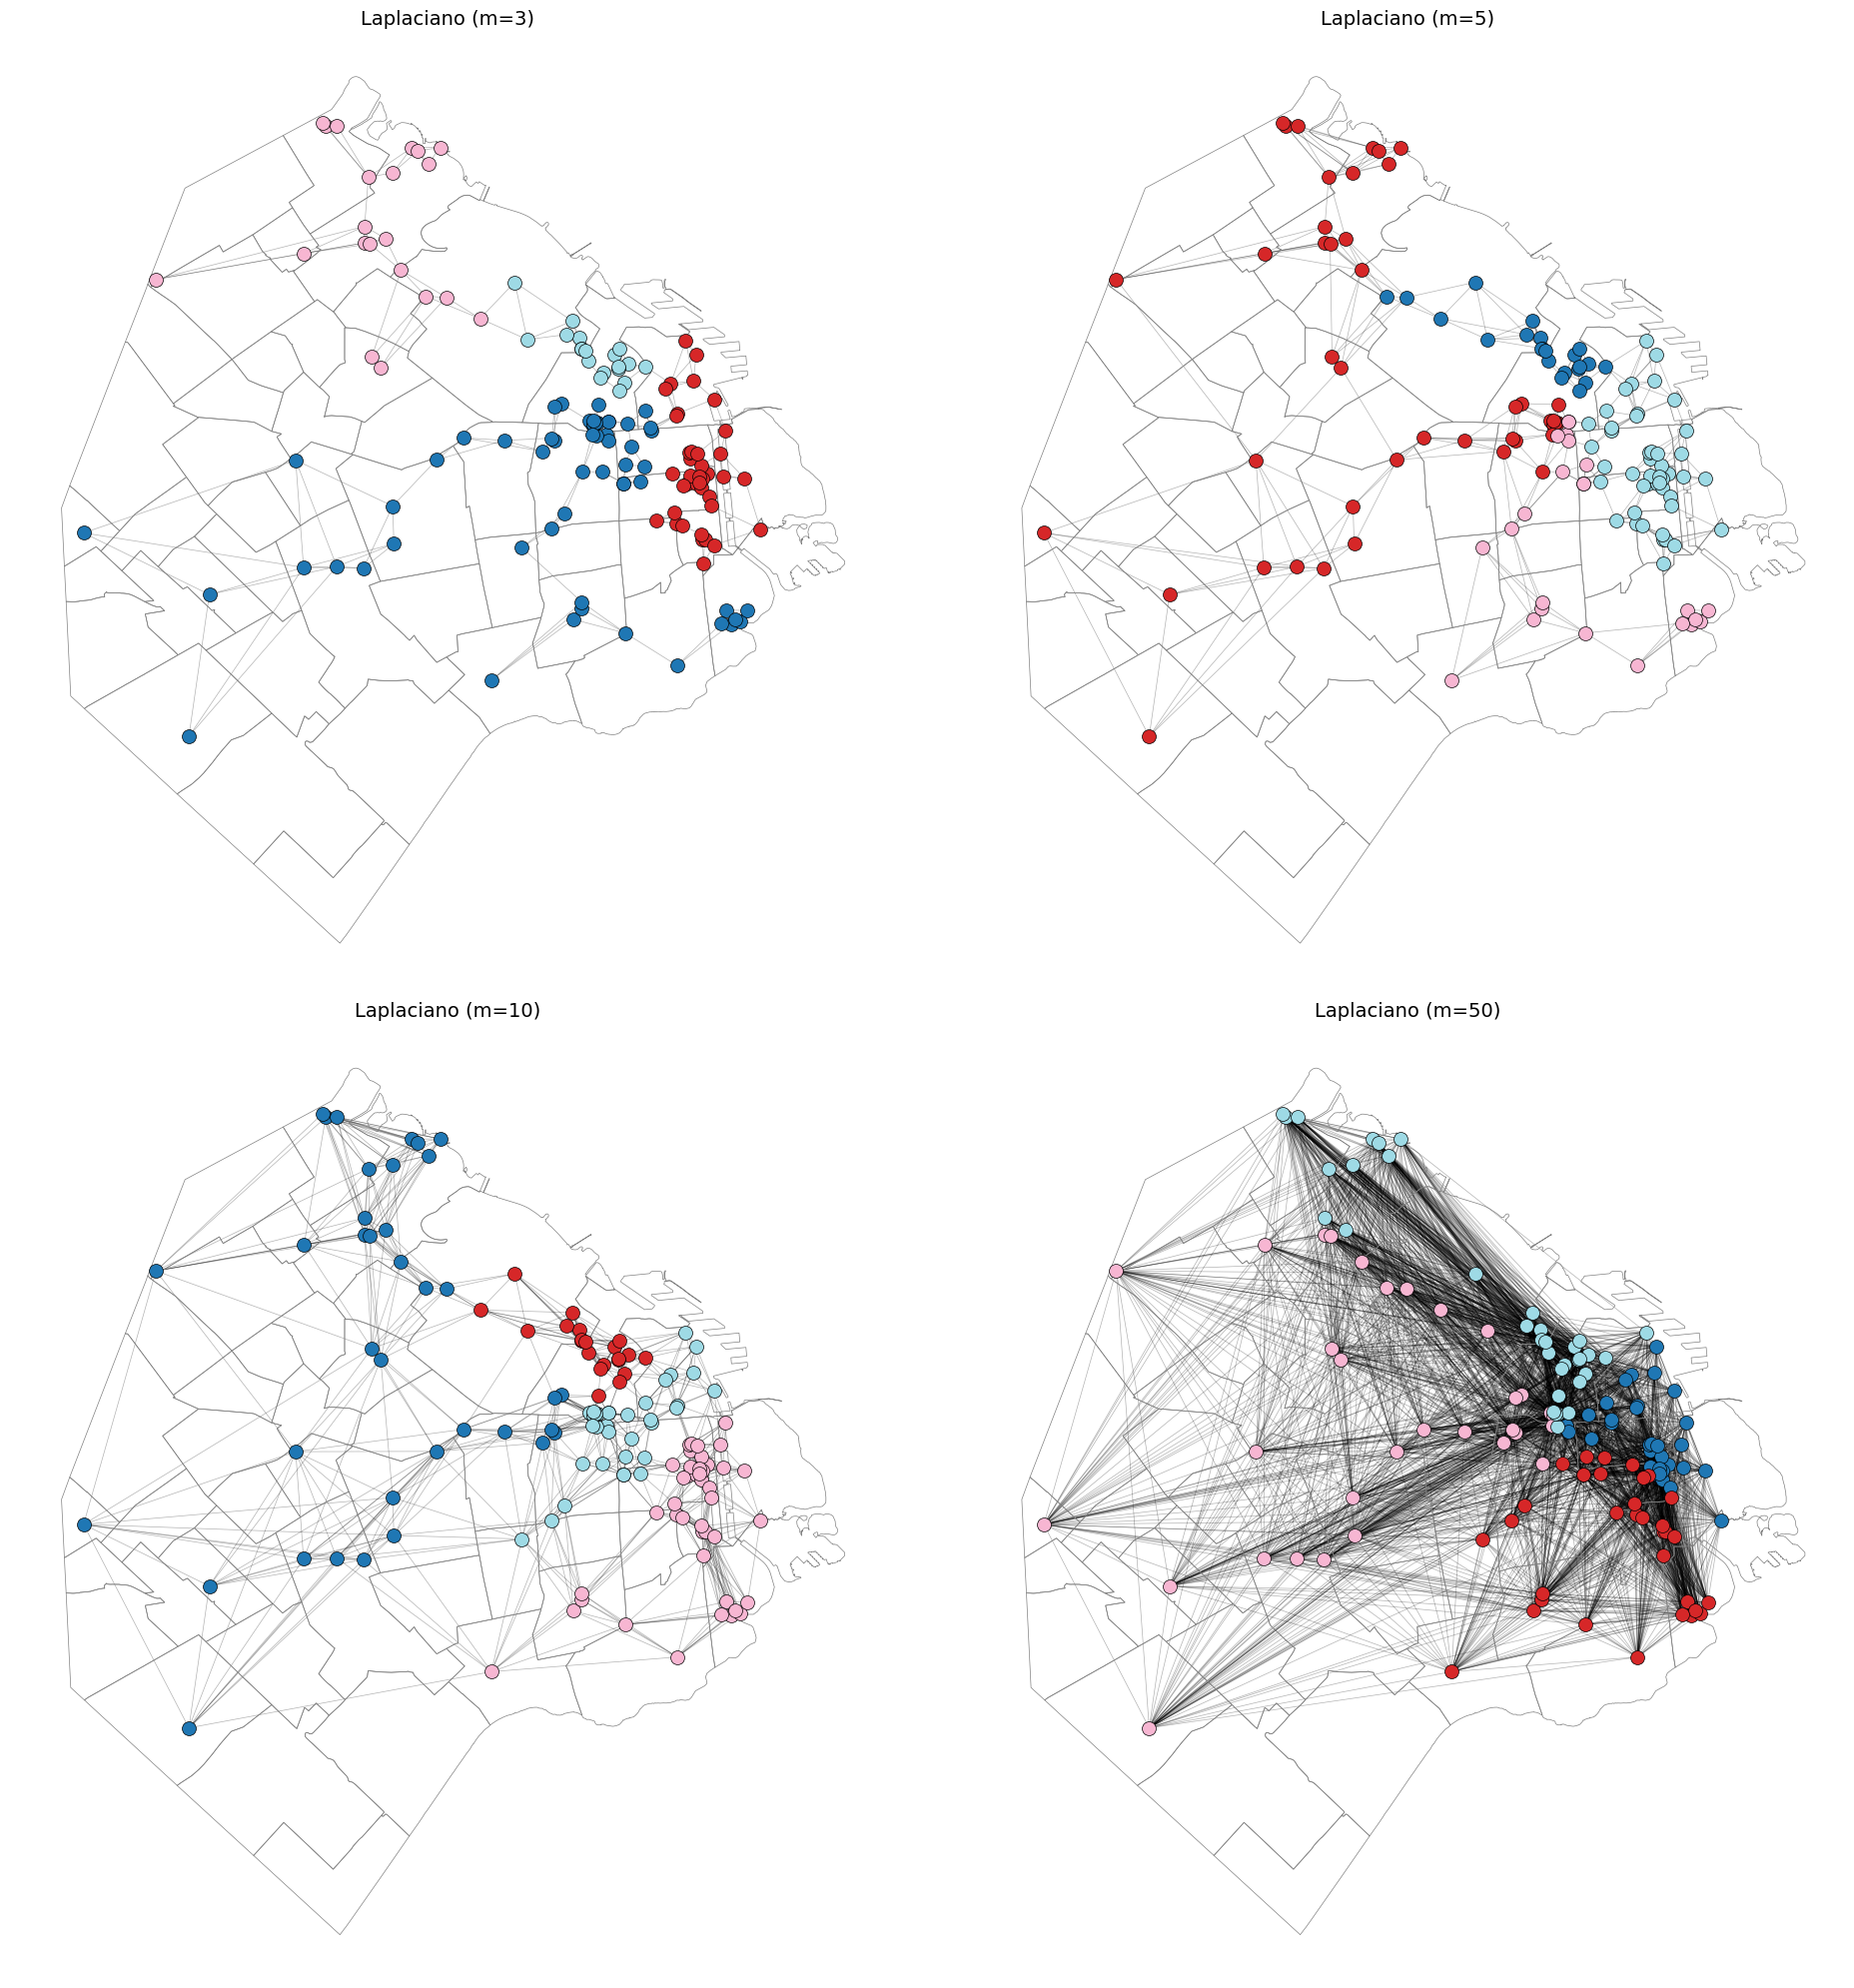


Resultados con el método de Modularidad:


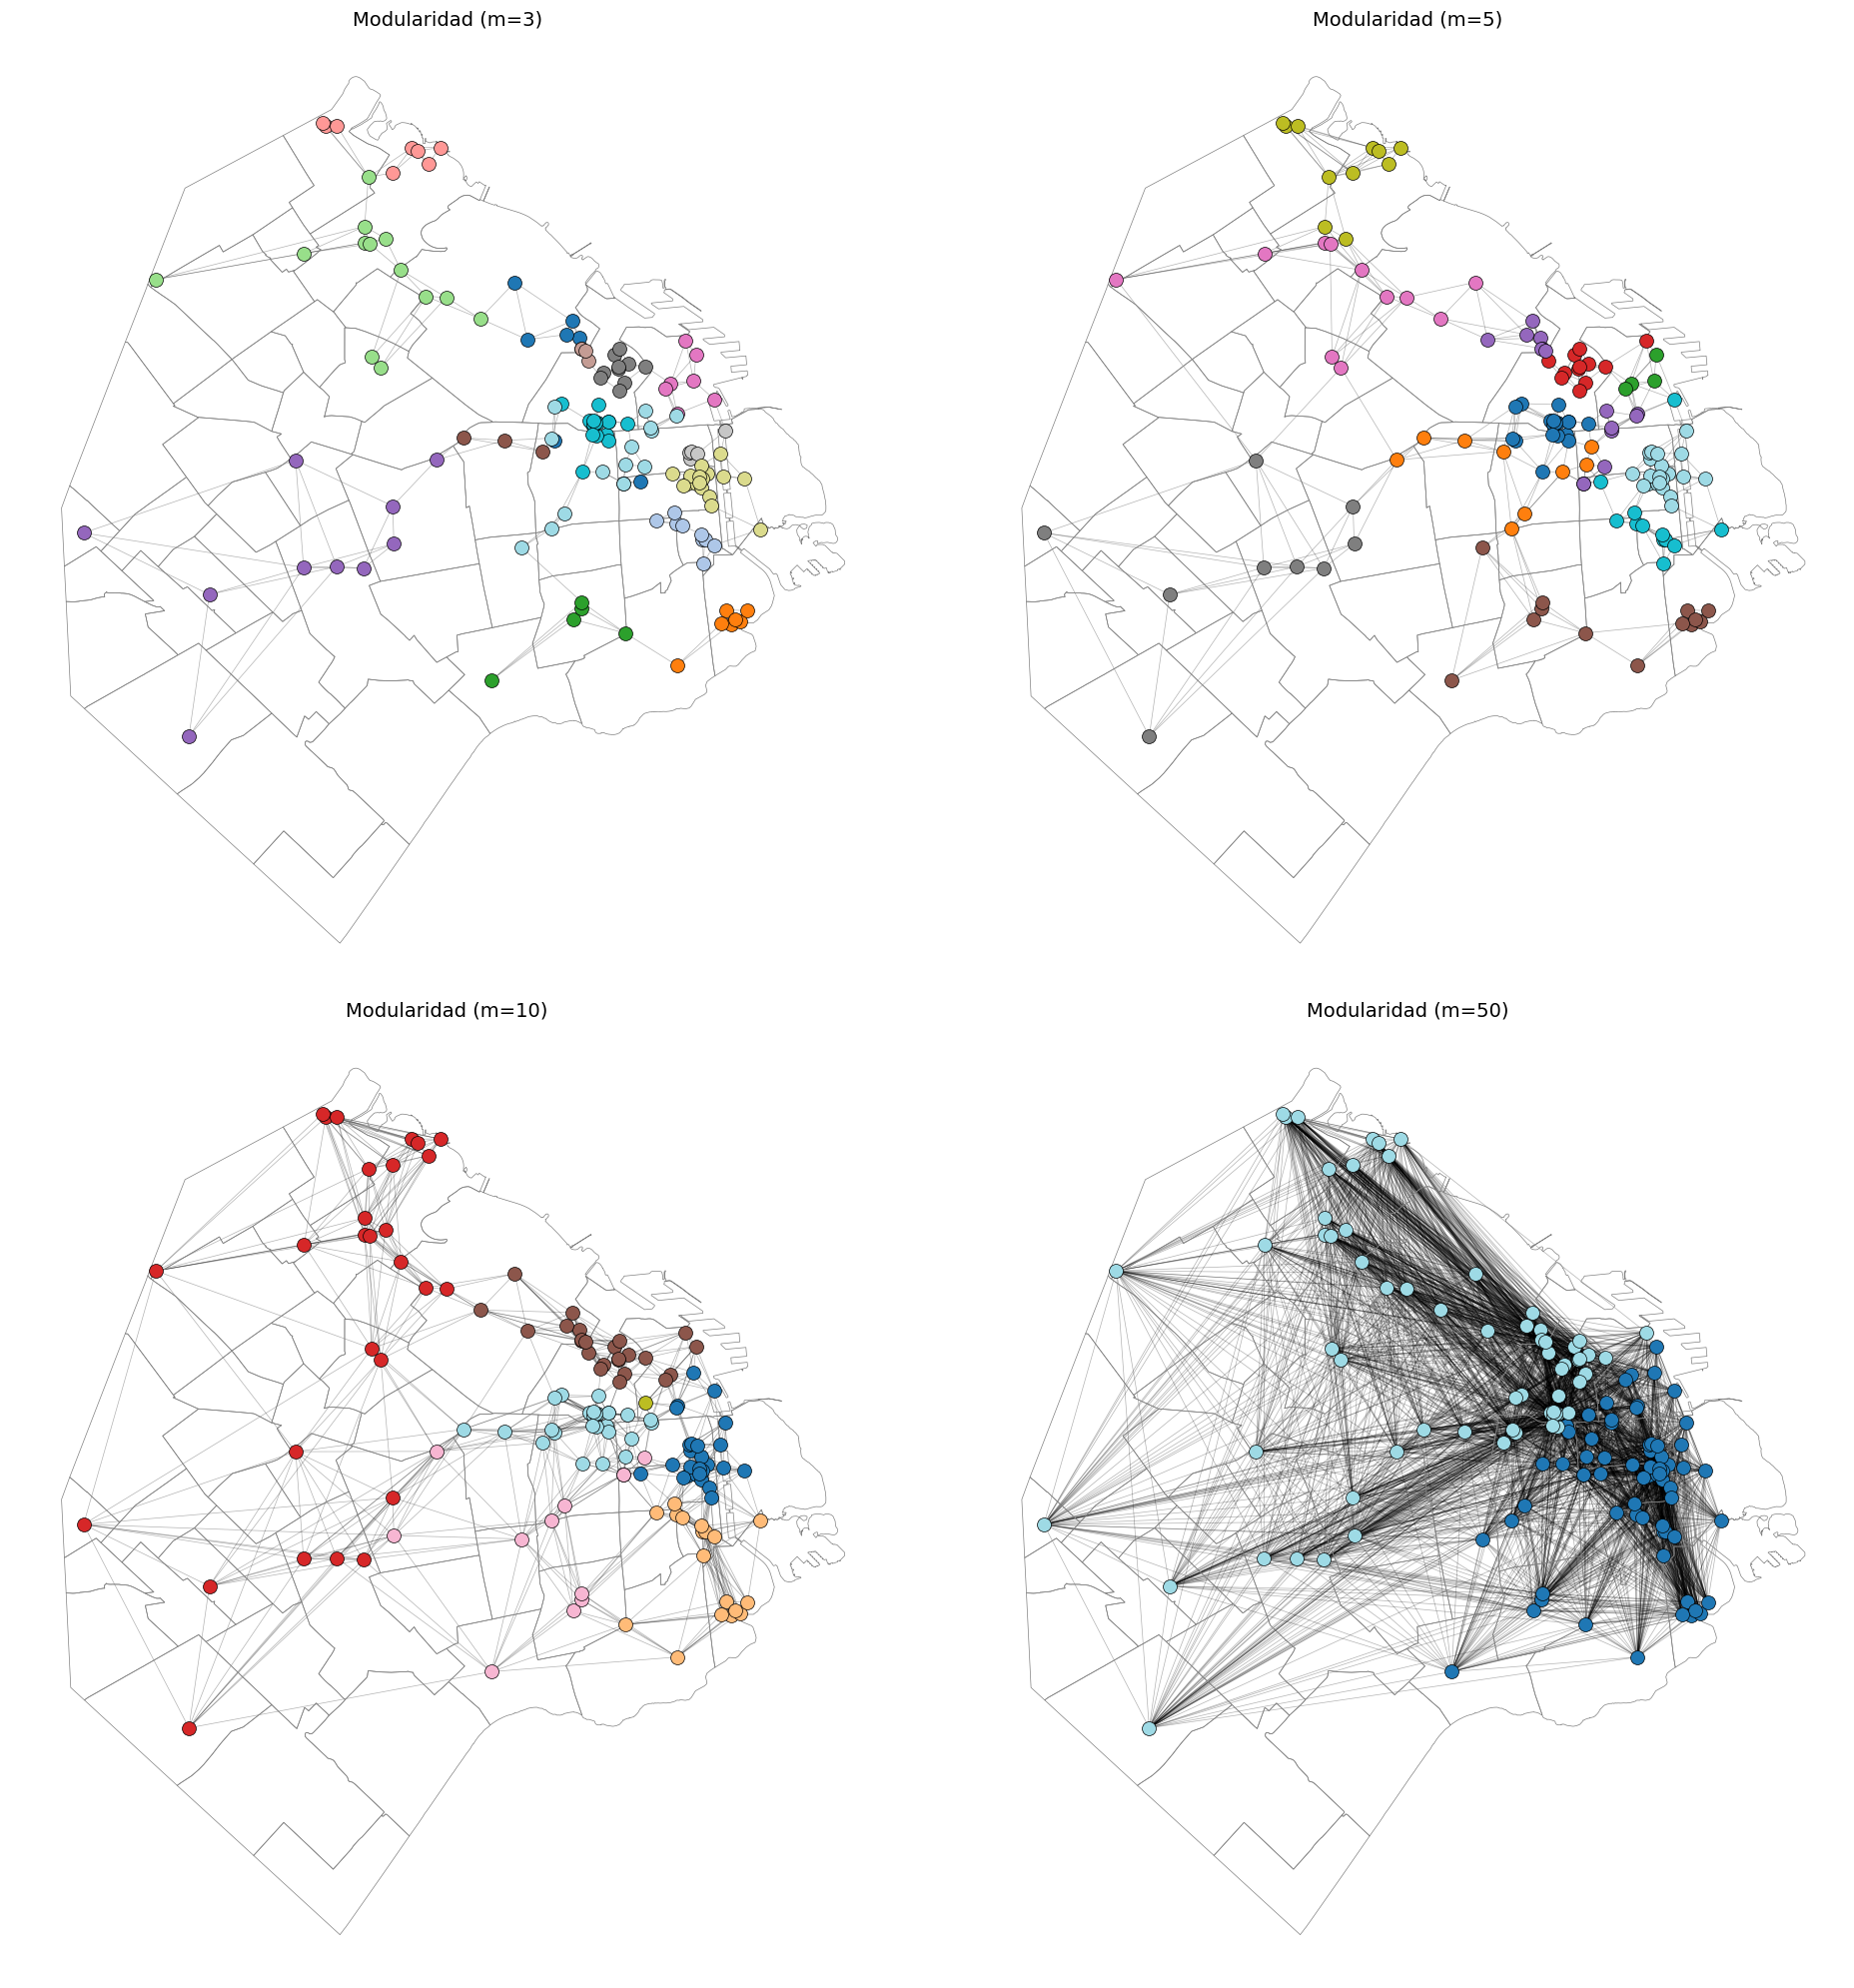

In [ ]:
# Vuelta a la red de los museos... Usando la red de museos definida en el TP anterior,
# calcule las particiones ´optimas usando el m´etodo basado en el laplaciano y el m´etodo
# basado en la modularidad. Utilice la matriz de adyacencia A construida usando m = 3, 5, 10, 50


# Copiamos el script dado nuevamente, porque nos salta un problema de notebook

# Leemos el archivo, retenemos aquellos museos que están en CABA, y descartamos aquellos que no tienen latitud y longitud
museos = gpd.read_file('https://raw.githubusercontent.com/MuseosAbiertos/Leaflet-museums-OpenStreetMap/refs/heads/principal/data/export.geojson')
barrios = gpd.read_file('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson')

D = museos.to_crs("EPSG:22184").geometry.apply(lambda g: museos.to_crs("EPSG:22184").distance(g)).round().to_numpy()

# valores de m que nos piden
m_requeridos = [3,5,10,50]

# Guardamos los resultados para analizar
resultados_laplaciano = {"laplaciano" : {}}
resultados_modularidad = {"modularidad" : {}}


for m in m_requeridos:

  # Matriz de adyacencia requerida y la simetrizamos como piden
  A_enunciadoTp1 = construye_adyacencia(D,m)
  A = A_sim(A_enunciadoTp1)

  # Calculamos la parte del laplaciano
  particion_laplaciano = laplaciano_iterativo(A, niveles = 2)
  resultados_laplaciano["laplaciano"][m] = particion_laplaciano

  # Calculamos la parte de modularidad
  particion_modularidad = modularidad_iterativo(A)
  resultados_modularidad["modularidad"][m] = particion_modularidad


print(f"\nLos resultados del laplaciano son : {resultados_laplaciano}")
print(f"\nLos resultados de modularidad son : {resultados_modularidad}")


                                                                  # ==== Visualizacion ==== #


# Función mejorada para graficar
def graficar_subplots(museos, barrios, resultados, metodo):
    fig, axs = plt.subplots(2, 2, figsize=(20, 20))
    axs = axs.ravel()

    for idx, m in enumerate(m_requeridos):
        ax = axs[idx]
        barrios.boundary.plot(color='gray', ax=ax, linewidth=0.5)

        # Crear grafo
        A = A_sim(construye_adyacencia(D, m))
        G = nx.from_numpy_array(A)
        pos = {i: (museos.geometry.iloc[i].x, museos.geometry.iloc[i].y) for i in range(len(museos))}

        # Dibujar conexiones
        nx.draw_networkx_edges(
            G, pos, ax=ax,
            edge_color='black',
            alpha=0.3,
            width=0.5
        )

        # Dibujar nodos por comunidad
        comunidades = resultados[metodo][m]
        colores = plt.cm.tab20(np.linspace(0, 1, len(comunidades)))

        for i, com in enumerate(comunidades):
            nx.draw_networkx_nodes(
                G, pos,
                nodelist=com,
                node_color=[colores[i]],
                node_size=100,
                ax=ax,
                edgecolors='black',
                linewidths=0.5
            )

        ax.set_title(f'{metodo.capitalize()} (m={m})', fontsize=14)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Visualización
print("Resultados con el método del Laplaciano:")
graficar_subplots(museos, barrios, resultados_laplaciano, 'laplaciano')

print("\nResultados con el método de Modularidad:")
graficar_subplots(museos, barrios, resultados_modularidad, 'modularidad')



Veamos ahora como varia la estructura de las comunidades al aplicar nuestros dos metodos (Laplaciano y modularidad) para los valores de m = 3, 5, 10, 50. A partir de m construimos la matriz de adyacencia (A), que define la red en la que aplicamos los algoritmos.

Empezemos por el metodo del Laplaciano. "explicacion de como funciona el laplaciano"...(por ej: aplicamos una tecnica de corte espectral recursivo que divide el grafo en comunidades usando los vectores propios del Laplaciano de la red). Veamos que utilizamos dos niveles de particion, ya que el Laplaciano no tiene un criterio automatico de parada. Debido a esta decision, para todos los valores de m conseguimos la misma cantidad de comunidades, forzamos una particion binaria recursiva hasta obtener 4 comunidades. Sin embargo, por mas que la cantidad se mantiene fija, la forma de las comunidades cambia. Al cambiar la cantidad de vecinos cercanos que se conectan entre si, cambiamos la matriz de adyacencia (A), y recordemos que el Lapciano esta definido como: L = D - A. Por lo que al modificar m, modificamos "L" tambien. En los graficos podemos observar que para los valores de m mas bajos, las comunidades tienden a respetar fronteras geograficas, ya que las conexiones estas mas ligadas a la cercania fisica (se consideran por ejemplo "los 3 vecinos mas cercanos"). Por otro lado para los valores de m mas altos, cada nodo se conecta con otros mas lejanos, por lo que la red se vuelve mas densa. Esto genera que se pierda la estructura local y las comunidades se mezclen en distintas zonas geograficas.

Ahora, analizemos que sucede al utilizar el metodo de modularidad. "CMO FUNCIONA EL METODO DE LA MODULARIDAD, QUE ES" (por ejemplo: "detecta comunidades maximizando la densidad de conexiones dentro de grupos respecto al modelo nulo"). Para m = 3, se muestran comunidades mas chicas que respetan sus zonas geograficas. Esto sucede porque al considerar solo los 3 vecinos mas cercanos, la red tiene conexiones muy locales. A medida que aumentamos el valor de m, aumenta tambien el tama~no de las comunidades. Esto genera que haya cada vez menos comunidades. Finalmente, en el ultimo grafico podemos ver que al tener una red fuertemente conectada, el algoritmo detecta tan solo dos comunidades. Concluimos que para valores de m mas altos, se generan agrupaciones mas generales.

Veamos que el valor mas "comparable" entre ambos metodos es cuando m = 10. En modularidad conseguimos 7 comunidades y con el Laplaciano 4. Veamos que las comunidades del Laplaciano tienden a estar menos alineadas con las fronteras geografias. Mientras que en el de Modularidad respetan mas el espacio urbano.

## Discusion de los resultados obtenidos



# Sintesis Final



ESCRIBIR AQUI LA SINTESIS FINAL EN 400 PALABRAS
" Habiendo realizado las correcciones solicitadas al primer TP, escriba una conclusion general de lo observado al analizar la red de museos considerando tanto el TP1 como el TP2. Escriba un texto de 400 palabras discutiendo lo observando en la red de museos, vinculando los resultados obtenidos en ambos TPs. El texto debe detallar sus conclusiones y aprendizajes sobre los metodos y datasets empleados.